# Processamento de Imagens com OpenCV e Python.


# 1.  Formas de capiturar imagens com o Python e a OpenCV

### 1.1 Carregando imagens a partir de arquivos.

    Utiliza a função imread, salva em uma variável e entra com o endereço de onde está a imagem.

In [ ]:
import cv2

imagem = cv2.imread("imagem/R.jpg")
cv2.imshow("RGB", imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1.2. Carregando imagens a partir de vídeos

Como um vídeo são várias imagens exibidas em cada intervalo de tempo, é necessário utilizar um laço while.


In [ ]:
import cv2

capture = cv2.VideoCapture("video.mp4")

while True:
        ret, frame = capture.read()
        cv2.imshow("imagem",frame)
        
        if (cv2.waitKey(0) and (0xFF == ord("q"))):
            break

cv2.waitKey(0)
imagem.release()
cv2.destroyAllWindows()


### 1.3. Carregando Imagens a partir de uma webcam

Diferente das outas tecnologias, obter imagens a partir de uma Webcam é uma tarefa simples e descomplicada quando trabalhamos com Python e a biblitoeca OpenCV.

Apenas é necessário chamar o método VideoCapture(0) e exibir os frames com um laço while.


In [ ]:
import cv2

captura = cv2.VideoCapture(0)

while True:
     ret, frame = captura.read()
     cv2.imshow("Imagem", frame)
    
     if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    
cv2.waitKey(0)
captura.release()
cv2.destroyAllWindows()

In [ ]:
import cv2

captura = cv2.VideoCapture(0)

while True:
     ret, frame = captura.read()
    
     imagem = frame;
     azul, verde, vermelho = cv2.split(imagem)
     
     cv2.imshow("Imagem1", azul)
     cv2.imshow("Imagem2", verde)
     cv2.imshow("Imagem3", vermelho)
    
     if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
captura.release()
cv2.destroyAllWindows()

# 2. Representação de Cores no Espaço

## 2.1 Cores no Espaço RGB

 O Modelo de representação no Espaço RGB é o mais usado em todos os aspéctos. RGB (Red, Green, Blue), onde a cor do Pixel é dado em função da porcentagem entre as três cores. 
 
 É escolhido vermelho, verde e azul por conta das cores que o olho humano é capaz de capiturar.
 
 Cada cor no RGB são matemáticamente representadas por matrizes tridimensionais, que podem ser consideradas como três planos bidimensionais, uma para cada canal (vermelho, verde e azul). Cada elemento dessas matrizes bidimensionais é um número inteiro variando de 0 a 255, representando a intensidade do píxel na cor referida.
 
 
 ### 2.1.1 Segmentando canais de uma imagem RGB
 
 Um exemplo de como segmentar uma imagem colorida em função das cores da mesma.
 
 observação, o OpenCV trata o espaço RGB como BGR(blue, green, red)

In [ ]:
import cv2

#Carregando imagem RGB para então segmentar canais
imagem = cv2.imread("imagem/RGB.jpg")

#gerar as matrizes com as dimensões da imagem e nos canais de intensidade
azul, verde, vermelho = cv2.split(imagem)


#Exibindo imagens dos canais separados
cv2.imshow("Canal R", vermelho)
cv2.imshow("Canal G", verde)
cv2.imshow("Canal B", azul)

#salvando as imagens dos canais separados.
#Utiliza a função imwrite para salvar essas imagems, passando o 
#nome e a variável
cv2.imwrite("imagem/RGB/R-Canal-vermelho.jpg",vermelho)
cv2.imwrite("imagem/RGB/R-Canal-azul.jpg",azul)
cv2.imwrite("imagem/RGB/R-Canal-verde.jpg",verde)

#destroindo a janela
cv2.waitKey(0)
cv2.destroyAllWindows()


###  2.1.2. Combinando canais em uma imagem RGB

Da mesma forma que podemos segmentar canais de uma imagem RGB, podemos realizar o caminho inverso, no qual podemos  combinar os canais em uma única imagem


In [ ]:
import cv2

#carregando imagem RGB e segmentando canais
imagem= cv2.imread("imagem/RGB.jpg")
azul, verde, vermelho = cv2.split(imagem)

# combinando os três canais em uma única imagem
imagem = cv2.merge((azul,verde,vermelho))
cv2.imshow("Imagem",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.1.3. Convertendo imagens em RGB para tons cinza

Bastante simples. Esse método tem o objetivo de reduzir a quantidade de informações a serem processadas, a conversão de imagens coloridas em RGB para imagens em tons cinza é uma tarefa quase sempre realizada em sistemas de visão computacional.

Apenas precisa utilizar a função cv2.cvtColor


In [ ]:
import cv2

#carregnado imagem em RGB
imagem = cv2.imread("imagem/RGB.jpg")

#convertendo e exibindo imagem em tons de cinza
imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
cv2.imshow("Imagem", imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.2. Cores no Espaço HSV

É um dos modelos para processamente de imagens mais utilizado no mundo, pois, permite um grande grau de separação entre a cor e a iluminação, por esse motivo, frequentemente utilizado em algoritmos de segmentar objetos coloridos em imagens.

HSV - Matiz (Hue), Saturação (Saturation) e o valor (Value).

####  Matiz

É o componente que nos permite diferenciar visualmente o azul do vermelho e do verde. Representa a tonalidade da cor, pode ser vista como comprimento de onda dominante da cor. Ao modificar a Matiz, as cores de intensidades claras ou escuras, tendem a ser preservadas, bem como a luminosidade geral da imagem.


#### Saturação

É a pureza ou intensidade da cor. Quanto maior o valor da saturação, mais pura será a cor, quanto menor, mais próxima do sinza. Para saturação 0, a imagem será em tons de cinza.


#### Valor

Esse valor é referente ao brilho da cor, à luinosidade ou escala de claridade. Quanto maior a luminosidade, ou o valor deste componente, mais próximo ao branco a cor será representada, quanto menor, mais próxima do preto.


A representação do espaço HSV é dada por um cilindro ou um cone.



Em resumo: 
- Matiz (Hue) - Diferencia entre tom de azul, verde e vermelho.
- Saturacao (Saturation) - Qual a intensidade da cor, ou seja, a pureza. (de branco até a cor)
- Valor: luminosidade da cor, quanto maior será mais próximo do branco, quanto menor é mais próximo do preto.


### 2.2.1. Segmentando canais em uma imagem HSV

Em cvtColor utilizar o parâmetro COLOR_BGR2HSV que indica que será transformada do tipo RGB para HSV

In [ ]:
import cv2

#baixando imagem
imagem = cv2.imread("imagem/HSV.jpg")
cv2.imshow("Imagem original",imagem) #imagem original

imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV) #convertendo para HSV
cv2.imshow("Imagem original em HSV",imagem)#VISUALIZANDO como ficou
matiz, saturacao, valor = cv2.split(imagem)#segmentando em matrizes

#exibindo as matrizes
cv2.imshow("Canal H", matiz)
cv2.imshow("Canal S", saturacao)
cv2.imshow("Canal V", valor)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.2. Combinando Canais em uma imagem HSV

Também é possível combinar os canais e retornar a imagem original, utilizando o cvtColor com o padrão COLOR_HSV2BGR

In [ ]:
import cv2

#baixando imagem
imagem = cv2.imread("imagem/HSV.jpg")
cv2.imshow("Imagem original",imagem) #imagem original

imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV) #convertendo para HSV
cv2.imshow("Imagem original em HSV",imagem)#VISUALIZANDO como ficou
matiz, saturacao, valor = cv2.split(imagem)#segmentando em matrizes


#retornadno
imagem = cv2.merge((matiz,saturacao,valor))
imagem = cv2.cvtColor(imagem,cv2.COLOR_HSV2BGR)

cv2.imshow("Imagem recup0erada",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#capturando a imagem da WebCam e dividindo em 3 matizes de saturação.
import cv2


captura = cv2.VideoCapture(0)

while True:
     ret, frame = captura.read()
    
     imagem = frame;
     imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
     matiz, saturacao, valor = cv2.split(imagem)
     
     cv2.imshow("Matiz", matiz)
     cv2.imshow("Saturacao", saturacao)
     cv2.imshow("valor", valor)
        
     
     #recuperando imagem
     imagem = cv2.merge((matiz,saturacao,valor))
     imagem = cv2.cvtColor(imagem,cv2.COLOR_HSV2BGR)
     cv2.imshow("Imagem reconstruida",imagem)
    
     if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
captura.release()
cv2.destroyAllWindows()

### 2.2.3. Aplicações do espaço HSV

Quando desejamos segmentar objetos coloridos em uma imagem, o espaço de cor HSV é o modelo ideal a ser utilizado, justamente por representar informações relacionadas a cor em um canal exclusivo e ajudar a distinguir objetos de uma cor de outra.

Por exemplo, convertemos do RGB para HSV, para facilitar o trabalho. 
Rastrear objetos coloridos usando HSV é uma boa para robôs.

# 3. PRE-PROCESSAMENTO

## 3.1. Operações Básicas

Duas bastante utilizadas são:
- a obtenção e a modificação de valores numéricos que representam a cor de um determinado pixel.


### 3.1.1. Acessando e modificando valores de pixels

O openCv trata uma imagem como uma matriz de pixels, em que podemos acessar e modificar seus valores, assim como acessamos e modificamos os valores dos elementos de uma matriz qualquer.

Informações necessárias: coordenada (número da linha e a coluna do pixel cujo valor desejamos obter ou alterar).

O código abaixo exemplifica como podemos obter o valor numérico, que representa a cor de um pixel em uma imagem colorida.

In [ ]:
import cv2

imagem = cv2.imread("imagem/RGB.jpg")
valorPixel = imagem[150,150]
print(valorPixel)

cv2.imshow("imagem/RGB.jpg",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

O primeiro valor do vetor é o azul, verde e vermelho, respectivamente.

Para recuperar após transformar em cores de tons cinza


In [ ]:
import cv2

imagem = cv2.imread("imagem/RGB.jpg")
imagem = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)
valorPixel=imagem[150,150]

cv2.imshow("imagem/RGB.jpg",imagem)
print(valorPixel)

cv2.waitKey(0)
cv2.destroyAllWindows()

O código transforma o pixel em RGB num tom de cinza entre 0 e 255.

Podemos também retornar apenas uma coordenada da intensidade do pixel em RGB, por exemplo.

In [ ]:
import cv2

imagem = cv2.imread("imagem/RGB.jpg")
valorPixelAzul = imagem[150,150,0]
valorPixelVerde = imagem[150,150,1]
valorPixelVermelho = imagem[150,150,2]
valorPixel = imagem[150,150]

print(valorPixelAzul)
print(valorPixelVerde)
print(valorPixelVermelho)
print(valorPixel)
cv2.imshow("imagem/RGB.jpg",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

Podemos alterar livremente os valores dos pixels, visto que a imagem é uma matriz numérica

Como o exemplo abaixo

In [ ]:
import cv2

imagem = cv2.imread("imagem/RGB.jpg")
cv2.imshow("imagem2",imagem)
print(imagem[150,150])
imagem[150,150] = [255,255,255]
print(imagem[150,150])

cv2.imshow("imagem",imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

Também é possível acessar informações sobre a imagem...

Utilizando o método shape, que retorna o número de linhas, colunas e número de canais de uma determinada imagem.

Também é possível exibir o tamanho da imagem, em pixels, utilizando o método size. Que resulta no produto de linhas * colunas * canais

In [ ]:
import cv2

#lendo a imagem e transformando em uma matriz
imagem=cv2.imread("imagem/RGB.jpg")
print(imagem.shape)#dados da imagem
print(imagem.size) #Quantidade de pixels
print(imagem.size/imagem.shape[2])


#Criar uma linha colorida na imagem
for i in range(1,imagem.shape[0]): #varre as linhas
    for j in range(1,imagem.shape[1]): #varre as colunas 
        if (j>=250 and j<=273) or (i>=200 and i<=240):
            imagem[i,j] = [255,0,0]
            
            
#imprimir imagem
cv2.imshow("imagem",imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

Como o método size retorna o produto dos três componentes de shape, devo dividir por 3 para então encontrar quantos pixels (unidade de imagem) temos.

### 3.2. Histograma de Cores

Informa a distribuição de frequência dos níveis de cinza com relação ao número de amostras. De um histograma podemos obter informações sobre a qualiadade de imagem, intensidade luminosa e contraste.


#### Imagens em tons de cinza

O principal dado desse tipo de análise é o nível de contraste da imagem, por exemplo, um baixo nível de contraste é caracterizado por apresentar um histograma estreitos, ou seja, muitos elementos concentrados em intervalos pequenos.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

#lendo a imagem
imagem = cv2.imread("imagem/R.jpg")

#convertendo para tons de cinza
imagem = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)

#gerando gráfico
grafico.hist(imagem.ravel(),256,[0,256])
grafico.show()

cv2.imshow("imagem",imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Imagens coloridas

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

imagem = cv2.imread("imagem/R.jpg")
azul, verde, vermelho = cv2.split(imagem)


grafico.hist(azul.ravel(),256,[0,256])


grafico.figure()
grafico.hist(verde.ravel(),256,[0,256])
0

grafico.figure()
grafico.hist(vermelho.ravel(),256,[0,256])


grafico.show()

cv2.imshow("imagem",imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#Código de implementação de um histograma normalizado
import cv2 
from matplotlib import pyplot as plt
import numpy as np

#Função para gerar histograma
def da_hist(img, L=256):
    shape_img = np.shape(img)
    h = np.zeros(L)
    
    for j in range(0,shape_img[1]):
        for i in range(0, shape_img[0]):
            if(img[i,j] != 0):
                h[img[i,j]] = h[img[i,j]]+1;
    
    #Normalizando histograma
    p = np.divide(h,shape_img[0]*shape_img[1])
    
    return p

#carregando imagem
f = cv2.imread("imagem/R.jpg", 0)

#Número de intensidades para "uint8"
L = 256;
fk=range(0,L)

#Utilizando a função que eu criei
p = da_hist(f,L);

#Usando a biblioteca matplotlib para imprimir
fig = plt.figure()
plt.bar(fk,p)
plt.ylabel("Ocorrências",fontsize=14);
plt.xlabel("Níveis de Intensidade",fontsize=14)

#### Equalização do Histograma

Algumas observações:

- Imagens superexpostas, geralmente, apresentam histogramas com maior parte dos elementos concentrados à direita. Do contrário, imagens subexpostas apresentam mais elementos concentrados a esquerda, portanto, um baixo nível de luminosidade.

- Imagens com menor nível de contraste, geralmente são observadas por histogramas mais "estreitos", ou seja, elementos concentrados em intervalos maiores.

- Imagens com maior nível de contraste apresentam histogramas largos, com elementos distribuídos por toda faixa de tons de cinza disponível

O objetivo da equalização do histograma é justamente modificar a tonalidade dos pixels da imagem, com o intuito de redistribuir o histograma, resultando numa imagem mais nítida, contendo pixels com tonalidades de cinza variando de 0 a 255.

O python já tem uma função para isso, na biblioteca OpenCV, que é a equalizeHist. Exemplo abaixo.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

#lendo a imagem
imagem = cv2.imread("imagem/CM.jpg")

#convertendo para tons de cinza
imagem = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)

imagemOriginal = imagem #Imagem em tons de cinza
imagemEqualizada = cv2.equalizeHist(imagemOriginal)

#gerando gráfico
grafico.hist(imagemOriginal.ravel(),256,[0,256])

grafico.figure()
grafico.hist(imagemEqualizada.ravel(),256,[0,256])

grafico.show()

cv2.imshow("imagem Original",imagemOriginal)
cv2.imshow("Imagem Equalizada",imagemEqualizada)
cv2.waitKey(0)
cv2.destroyAllWindows()

A equalização do histograma é encontrada a partir do histograma original utilizando o processo chamado de Mapeamento de intensidade por Gonzalez e Woods, dado pela fórmula:

$$
    s_{k}=T({r_{k}})=(L-1)\sum _{j=0}^{k}{p_{r}}({r_{j}})={\frac {(L-1)}{M\,N}}\sum _{j=0}^{k}{n_{j}}
$$

sendo k=0,1,2,...,L-1 e

$$
    p_r(r_k) = \frac{n_k}{MN}
$$

E, por fim, arredondando

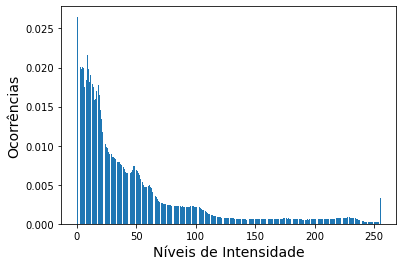

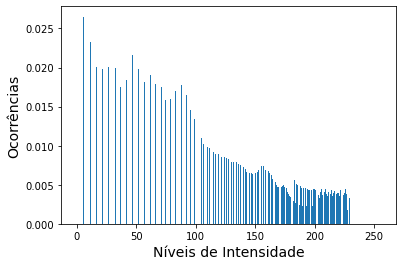

In [62]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

# Função para gerar histograma já normalizado
def da_hist(img, L=256):
    shape_img = np.shape(img)
    h = np.zeros(L)
    
    for j in range(0, shape_img[1]):
        for i in range(0, shape_img[0]):
            if(img[i,j] != 0):
                h[img[i,j]] = h[img[i,j]] + 1;
    
    # Normalizando histograma
    p = np.divide(h, shape_img[0]*shape_img[1])
    
    return p

# Função para calcular distribuição acumulada.
def calcular_cdf(histograma):
    cdf = np.zeros_like(histograma)
    cdf[0] = histograma[0]

    for i in range(1, len(histograma)):
        cdf[i] = cdf[i-1] + histograma[i]

    return cdf

# Função para equalizar imagem.
def img_equalized(img, L=256):
    shape_img = np.shape(img)
    h = da_hist(img)
    
    # Cálculo da função de transferência acumulada
    cdf = calcular_cdf(h)
    
    # Imagem equalizada
    img_equalizada = np.zeros_like(img)
    
    for j in range(0, shape_img[1]):
        for i in range(0, shape_img[0]):
                valor = img[i,j]
                novo_valor = cdf[valor]*(L-1)
                img_equalizada[i,j] = novo_valor
    
    return img_equalizada
    
# Carregando imagem
f = cv2.imread("imagem/garagem.jpg", 0)

# Número de intensidades para "uint8"
L = 256
fk = range(0, L)

# Utilizando a função que eu criei
p = da_hist(f, L)

f_eq = img_equalized(f, L)
p_eq = da_hist(f_eq, L)

# Usando a biblioteca matplotlib para imprimir
fig = plt.figure()
plt.bar(fk, p)
plt.ylabel("Ocorrências", fontsize=14)
plt.xlabel("Níveis de Intensidade", fontsize=14)

fig = plt.figure()
plt.bar(fk, p_eq)
plt.ylabel("Ocorrências", fontsize=14)
plt.xlabel("Níveis de Intensidade", fontsize=14)

cv2.imshow("imagem Original",f)
cv2.imshow("Imagem Equalizada",f_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

Para uma imagem colorida, podemos primeiro transformar a imagem para o espaço HSV, aplicar a equalização e depois retornar ao espaço RGB.

Assim, podemos olhar para uma fotografia observando suas cores, tonalidades e contrastes. Os dados tabulados permitem que computadores também possam enxergar características numa imagem.


### 3.3. Transformações Geométricas


#### Operação de rotação 

Em suma, consistem girar uma imagem em um ângulo predeterminado. Na biblioteca OpenCV temos duas funções para isso: getRotationMatrix2D E warpAffine. 

 A primeira função consiste em encontrar a matriz de rotação, em que temos os parâmetros: center (centro da imagem), angle (Ângulo de rotação em graus) e scale (fator de escala)
 
 Exemplo:
 
 matriz = cv2.getRotationMatrix2D((totalColunas/2, totalLinhas/2),90,1)
 
 Obtida a matriz de rotação, a próxima etapa consiste em gerar a imagem rotacionada. Para esse procedimento, utiliza a função warpAffine, que possui os parâmetros: src (matriz referente a imagem), matriz (matriz de rotação), dsize (tamanho da imagem rotacionada)
 
 Segue abaixo um exemplo de aplicação...

In [ ]:
import cv2
import numpy as np

imagem= cv2.imread("imagem/CM.jpg")

#convertendo para tons de cinza
imagem = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)

imagemOriginal = imagem #Imagem em tons de cinza
totalLinhas, totalColunas = imagemOriginal.shape

matriz = cv2.getRotationMatrix2D((totalColunas/2, totalLinhas/2),180,0.8)

imagemRotacionada = cv2.warpAffine(
    imagemOriginal,
    matriz,
    (totalColunas, totalLinhas)
)

cv2.imshow("Resultado", imagemRotacionada)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Operação de Translação

Consistem em deslocar uma imagem de posição. Podemos realizar essa  operação com a função warpAffine, contudo, precisamos primeiro da matriz de translação, que indicará qual posição a imagem será movida.

A matriz de translação, ou deslocamento, é encontrada utilizando a função float32 da biblioteca Numpy. Para essa operação, é necessário dois vetores de três elementos:

- Primeiro vetor: O último elemento do primeiro vetor indica a quantidade de pixels referente ao deslocamento horizontal.
- Segundo vetor: O último elemento do segundo vetor indica a quantidade de pixels referentes ao deslocamento vertical.

Segue uma exemplo de aplicação.

In [ ]:
import cv2
import numpy as np

#imagem colorida?
imagemOriginal= cv2.imread("imagem/CM.jpg")

totalLinhas, totalColunas = imagemOriginal.shape[:2] #dimensões da imagem

#matriz de translação
matriz = np.float32([[1,0,100],[0,1,30]])
imagemDeslocada = cv2.warpAffine(
    imagemOriginal,
    matriz,
    (totalColunas, totalLinhas)
)

#mostrando resultado
cv2.imshow("Resultado", imagemDeslocada)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Ajuste de escala

Utilizando a função resize(src, dst,fx,fy,interpolation), permite que nos ajustemos a escala da imagem, ou seja, alterar proporcionalmente suas dimensões sem que o objeto representado seja distorcido.

Os parâmetros da função:
- src -> Matriz referente a imagem
- dst -> Imagem de saída
- fx -> Fatir de escala horizontal
- fy -> Fator de escala vertical
- interpolation -> Método de interpolação

A seguir segue um código de exemplo

In [ ]:
import cv2
import numpy as np

imagem = cv2.imread("imagem/CM.jpg")

#imagem modificada
imagemModificada = cv2.resize(
    imagem,  #imagem original
    None,    #variável que receberá a imagem
    fx=1.5,  #fator no eixo x
    fy=0.5,  #fator no eixo y
    interpolation = cv2.INTER_CUBIC) #método de interpolação

cv2.imshow("Resultado", imagemModificada)

cv2.waitKey(0)
cv2.destroyAllWindows()

A biblioteca OpenCV nos fornece 5 opções de funções de interpolação. A mais utilizada é o algorítmo cv2.INTER_CUBIC. 


#### Ajuste de perspectiva

Fatores como posicionamento incorreto, a lente ou até mesmo o balanço da câmera podem interferir na perspectiva da fotografia, causando inclinaçõa ou distorção do objeto representado na imagem. 

A função da OpenCV para corrigir essas distorções são a _warpPerspective()_, no qual ela ajusta a perspectiva da imagem tendo como referência uma matriz predefinida de pontos, gerada pela função _getPerspectiveTransform()_. Em resumo, os pontos escolhidos para ajustar a perspectiva serão as novas arestas da nova imagem gerada após o processamento.

A seguir um exemplo desse processamento:


In [20]:
import cv2
import numpy as np

imagem = cv2.imread("imagem/CM.jpg")

cv2.imshow("imagem original", imagem)
pontosIniciais = np.float32(
    [[189,87],[459,84],[192,373],[484,372]]
)
pontosFinais = np.float32(
    [[0,0],[500,0],[0,500],[500,500]]
)

#matriz de perspectiva
matriz = cv2.getPerspectiveTransform(
    pontosIniciais, pontosFinais
)

#imagem modificada
imagemModificada = cv2.warpPerspective(
    imagem, matriz, (500,500)
)

cv2.imshow("Imagem Modificada", imagemModificada)
cv2.waitKey(0)
cv2.destroyAllWindows()

A função float32, indica que os números armazenados são do tipo "float" e apresentam 6 bits para representação do expoente e 23 bits para a mantissa. Que é uma condição necessária para a função getPerspectiveTransform, que opera com valores numéricos nesse formato.

### 3.4. Operações Aritméticas 

Essa operações nos permitem adicionar o conteúdo de uma imagem em outra, ou até mesmo misturá-los. 

- GERALMENTE, para que as opções de adição e mistura possam ser realizadas, é necessário que as imagens possuam a mesma dimensão (largura x altura) e tipo (8 bits, por exemplo).

Ao realizar operações aritméticas em uma imagem, devemos nos lembrar que cada pixel é representado em 8 bits (nas que estou trabalhando). Ou seja, um número variando entre 0 a 255, dessa maneira, é importante estar atento à possibilidade de overflow, ou seja, valores que ultrapassem 255...

#### Operação de adição

Consiste em somar os valores dos pixels de uma imagem em outra, resultando numa nova imagem. A função add da biblioteca OpenCV nos permite realizar rapidamente essa operação.

In [ ]:
import cv2

fichasVermelhas = cv2.imread("imagem/vermelhas.png")
fichasPretas = cv2.imread("imagem/pretas.png")

imagem = cv2.add(fichasVermelhas, fichasPretas)

cv2.imshow("VERMELHA",fichasVermelhas)
cv2.imshow("Pretas",fichasPretas)
cv2.imshow("Resultado",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

Também é possível utilizar a função add para gerar uma análise e mudança do contraste de uma image, utilizando a função add.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

imagem = cv2.imread("imagem/CM.jpg")
#convertendo para tons de cinza
imagem = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)

#criando outras
imagemClara = cv2.add(imagem, 40)
imagemEscura = cv2.add(imagem,-40)


cv2.imshow("Imagem original",imagem)
cv2.imshow("Imagem Clara",imagemClara)
cv2.imshow("Imagem Escura",imagemEscura)

grafico.hist(imagem.ravel(),256,[0,256])

grafico.figure()
grafico.hist(imagemClara.ravel(),256,[0,256])

grafico.figure()
grafico.hist(imagemEscura.ravel(),256,[0,256])

grafico.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


#### Operação de subtração

A subtração de uma imagem fornece as diferenças entre uma imagem e outra, além disso, pode-se ter uma ideia da mudança de local de um objeto em movimento entre uma captura e outra.

Uma função da biblioteca OpenCV que permite fazer isso é a subtract, como no exemplo a seguir

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

posicao1 = cv2.imread("imagem/posicao1.png")
posicao2 = cv2.imread("imagem/posicao2.png")

imagem = -cv2.add(-posicao1, posicao2)
imagem2 = cv2.subtract(posicao1, posicao2)


#A função subtract(a,b) é equivalente à: -cv2.add(-a,b)

cv2.imshow("posição 1",posicao1)
cv2.imshow("Posição 2",posicao2)
#cv2.imshow("Resultado1",imagem)
cv2.imshow("Resultado2",imagem2)

cv2.waitKey(0)
cv2.destroyAllWindows()



#### Operação de Mistura

A operação de mistura consiste em mesclar, com perda de dados, as informações duas imagens em apenas uma. Em outras palavras, ela também realiza uma soma entre os valores dos pixels das imagens, entretanto, com pesos diferentes, mesclando-as proporcionando um efeito de mistura ou transparência.

A função da biblioteca OpenCV que nos permite realizar essa operação é a addWeighted, que necessita de 5 parâmetros

- src1: Matriz referente a primeira imagem
- alpha: intensidade da primeira imagem
- src2: matriz referente à segunda imagem.
- beta: intensidade da segunda imagem
- gamma: valor escalar adicionado a cada soma.

_Obs: Deve-se lembrar que as imagems PRECISAM ter o mesmo número de colunas, linhas e canais. Além disso, as intensidades "alpha" e "beta" devem estar entre 0 e 1._


O exemplo é dado abaixo:

In [ ]:
import cv2

fichasVermelhas = cv2.imread("imagem/vermelhas.png")
fichasPretas = cv2.imread("imagem/pretas.png")

imagem = cv2.addWeighted(fichasVermelhas,1, fichasPretas,0.2,0)

cv2.imshow("Vermelhas",fichasVermelhas)
cv2.imshow("Pretas",fichasPretas)
cv2.imshow("Resultado",imagem)

cv2.waitKey(0)
cv2.destroyAllWindows()

#usando o plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1),plt.imshow(fichasVermelhas),plt.title('Fichas vermelhas')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(fichasPretas),plt.title('Fichas pretas')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(imagem),plt.title('Resultado')
plt.xticks([]), plt.yticks([])
plt.show()

#### Operações de multiplicação e divisão

A operação de multiplicação entre duas imagens pode ser efetuada pela função _multiply_ da biblioteca OpenCV. Esta operação efetua o produto escalar entre os valores dos pixels de mesma posição nas duas imagens. Essa função pode ser utilizada para multiplicar os valores dos pixels por um mesmo número inteiro positivo

Outra operação simples é a de divisão. Esta operação pode funcionar tanto como ajuste de contraste, como para determinar se duas imagens são idênticas (divisão igual a 1). Entretanto, exige mais processamento que o processo de subtrair, então não é muito eficiente.

A função do OpenCV que permite dividir uma imagem por outra é a _divide_. Contudo, não são funções muito utilizada

_Obs: Até agora foram apresentados métodos e procedimentos utilizados para realçar objetos de interesses em imagem._

### 3.5. Ruído em imagens

Os métodos anteriores são utilizados, principalmente, para realçar objetos de interesses em imagens, entretanto, eles realçam ruídos nas imagens processadas.  

- Ruídos: Pequenas variações aleatórias, sofridas pelo sinal, que dificultam a leitura do valor real.

Os principais fatores que podem produzir ruídos nas imagens são:

- _Ruído de captura:_ Variações indesejadas provocadas por: peira do ambiente, vibração da câmera, destorção da lente, iluminaçõa inadequada e ruído elétrico no sensor.

- _Ruído de amostragem:_ Ocorre quando o sinal digital amostrado não corresponde à representaçõoes verdadeira da imagem analógica. Limitações na amostragem e na quantização de intensidade de cor provocam esse tipo de ruído. 

- _Ruído de processamento:_ são gerados quando há limitações na precisão numérica. Ocorrem quando há overflow de números inteiros ou aproximações matemáticas de valores representados em ponto flutuante. É comum de ocorrer quando filtros, para aguçar informações de contornos, são aplicados a imagens. 

- _Ruído de codificação de imagem:_ Esses ruídos são gerados por técnicas de compressão de imagens com perda. Por exemplo, o método de compactação JPEG gera ruído de codificação de imagem. Esses ruídos são prejudiciais para o processamento da imagem.

- _Oclusão de cena:_ Quando o objeto de interesse está obscurecido por outro.

- _Ruído sal e pimenta (Ruído impulsivo):_ É caracterizado pela adição aleatória de pixels pretos e brancos, intensos ou fracos, na imagem. 

- _Ruído gaussiano (Ruído aditivo):_ Ocorre quando a variação aleatória do sinal segue a distribuição gaussiana. Em imagens digitais, esses ruídos são geralmente provocados por problemas de iluminação ou alta temperatura durante a aquisição.

- _Ruído em imagens binárias:_ Uma imagem gerada a partir do procedimento de binarização, quase sempre apresenta ruídos que precisam ser eliminados.


### 4. APLICAÇÕES DE FILTROS

Filtros espaciais são matrizes que percorrem toda a imagem, alterando os valores do pixels, a fim de corrigir, suavizar ou realçar determinadas regiões. Essas matrizes são conhecidas como máscaras ou núcleos, atuam modificando os valores referenets ao nível de cinza de cada pixel da imagem. Esse processo também é conhecido como _convolução_ entre o sinal da imagem e o do filtro

o pixel-alvo é aquele no qual será submetido o procedimento a cada iteração, Os pixels ao redor são conhecidos como _vizinhança_. Um possível problema que ocorra nesa operação é de que a mascara não se encaixe nas bordas, portanto, uma forma de corrigir isso é considerar os pixels fora da imagem como zero, ou desconsiderar as bordas, considerando apenas nas partes onde os pixels se encaixam.

filtros podem ser classificados como lineares e não-lineares:
- Filtros lineares: usam máscaras que realizam somas ponderadas das intensidades dos pixels ao longo da imagem. -> Suavizam, realçam detalhes e etc.

- Filtros Não-lineares: realizam somas não ponderadas. Realizam transformações que podem alterar o nível médio de cinza da imagem, destacar bordas, linhas e manchas. 

Também existem os filtros passa-baixas ou passa-altas, que se refe-re ao tipo de frequência que será filtrada.

- Filtro de passa-baixas: atenua bordas e contornos
- Filtro de passa-altas:  realça bordas ou contornos (alta frequência.)

### 4.1. Filtro de média

Filtro linear, classificado como passa-baixas, para suavização de imagens. Substitui cada pixel da imagem pelo valor médio de sua vizinhança. Quanto maior a ordem da mascara, mais pixels vizinhos serão considerados e maior será a suavização...

A função utilizada é a função blur


In [2]:
import cv2

imgOrig = cv2.imread("imagem/CM.jpg")
imgTrat = cv2.blur(imgOrig, (5,5))

cv2.imshow("Imagem Original", imgOrig)
cv2.imshow("Imagem filtrada", imgTrat)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 4.2. Filtro Gaussiano

Também é um filtro passa-baixas e linear. Apresenta bons resultados no tratamento de imagens com ruídos gaussianos. A função utilizada por ele é a GaussianBlur(), da biblioteca OpenCV. A diferença entre ele e o filtro de média é que ele precisa de três parâmetros: src, dimensão da máscara e o grau de suavização.



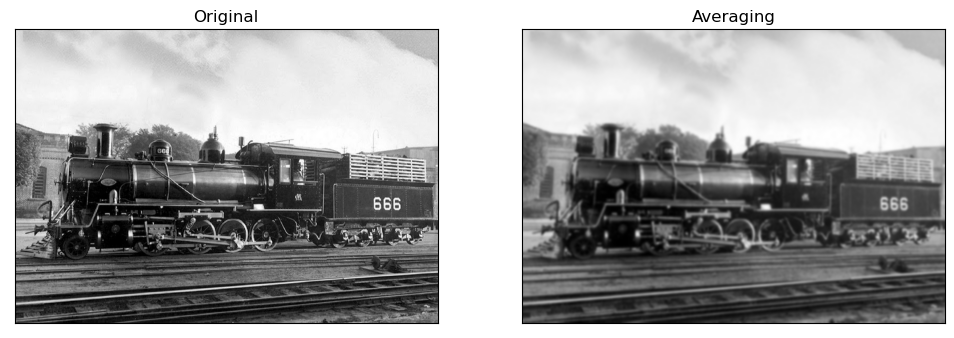

In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

imgOrig = cv2.imread("imagem/CM.jpg")
imgTrat = cv2.GaussianBlur(imgOrig, (11,11),2)

#imagem na tela
cv2.imshow("Imagem Original", imgOrig)
cv2.imshow("Imagem filtrada", imgTrat)

cv2.waitKey(0)
cv2.destroyAllWindows()


#plotando como resultado
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(imgOrig),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgTrat),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#Exemplo de aplicação do filtro média com outras funções
import cv2 
import numpy as np

#loand an image that is stored in the disk
f = cv2.imread("imagem/CM.jpg")

#Definindo a máscara que irei convoluir
mask = np.matrix( 
    [[0,1,0],
    [0,-4,0],
    [0,1,0]], np.float32)

#Convolução com a imagem
g = cv2.filter2D(f,-1,mask)


cv2.imshow("Imagem Original", f)
cv2.imshow("Imagem filtrada", g)

cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicação do filtro Gaussiano em uma imagem com ruidos gaussianos...


(([], []), ([], []))

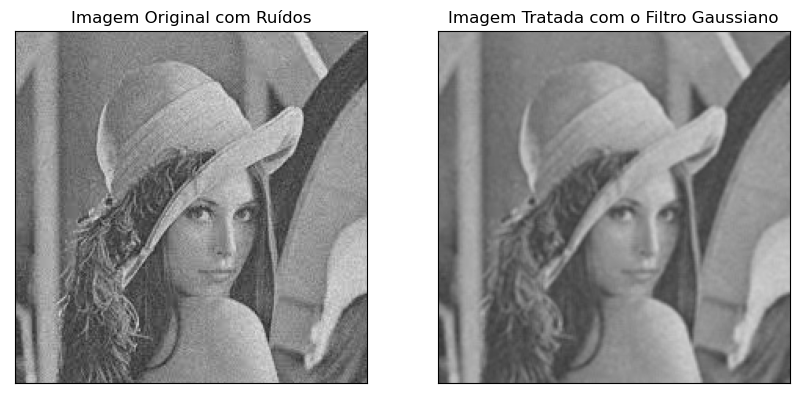

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("imagem/gaussiano.jpg")
imgGauss = cv2.GaussianBlur(img,(3,3),10)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(img),plt.title('Imagem Original com Ruídos')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(imgGauss),plt.title('Imagem Tratada com o Filtro Gaussiano')
plt.xticks([]),plt.yticks([])

### 4.3. Filtro Mediana

É um filtro não-linear, que apresenta bons resultados no tratamento de ruídos do tipo "sal e pimenta". Comparado ao Gaussiano, ele é mais eficaz e preserva detalhes de alta frequência, como bordas ou contornos.

Classificado como Edge-preserving-smoothing. Ele atua no valor do pixel-alvo pela mediana estatística dos valores dos pixels vizinhos. Utilizando a função medianBlur() da biblioteca OpenCV.

Apenas depende da imagem original e de sua intensidade.

(([], []), ([], []))

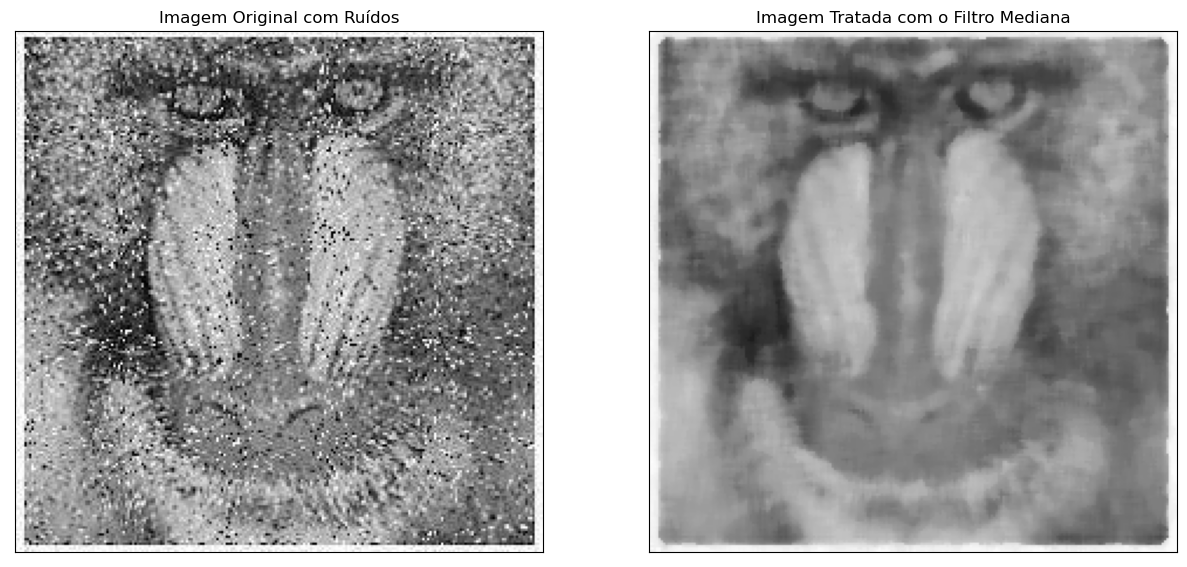

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("imagem/mediana.jpg")
imgGauss = cv2.medianBlur(img,7)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img),plt.title('Imagem Original com Ruídos')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(imgGauss),plt.title('Imagem Tratada com o Filtro Mediana')
plt.xticks([]),plt.yticks([])

### 4.4. Filtro Bilateral

É o filtro mais indicado quando o objetivo é suavizar a imagem preservando os detalhes de borda e contornos. A convolução desse filtro é similar a do guassiano, ou seja, o processo de suavização é semelhante a de um filtro passa-baixas, entretanto, modificado para preservar os detalhes de contorno.

A função da biblioteca OpenCV é o bilateralFilter(), necessário 4 parâmetros: src (imagem); tam( tamanho do filtro). (Contudo, quanto maior o valor o valor do segundo parâmetro, mais lenta será a execução desse método, não sendo recomendado trabalhar com valores superiores a 5 em processamento de imagens em tempo real.); Color (sigma color) e Space(sigma space). Esses dois ultimos valores não apresentam resultados significativos quando menores que 10. Quando maiores que 150, provocam tratamento muito intenso.

(([], []), ([], []))

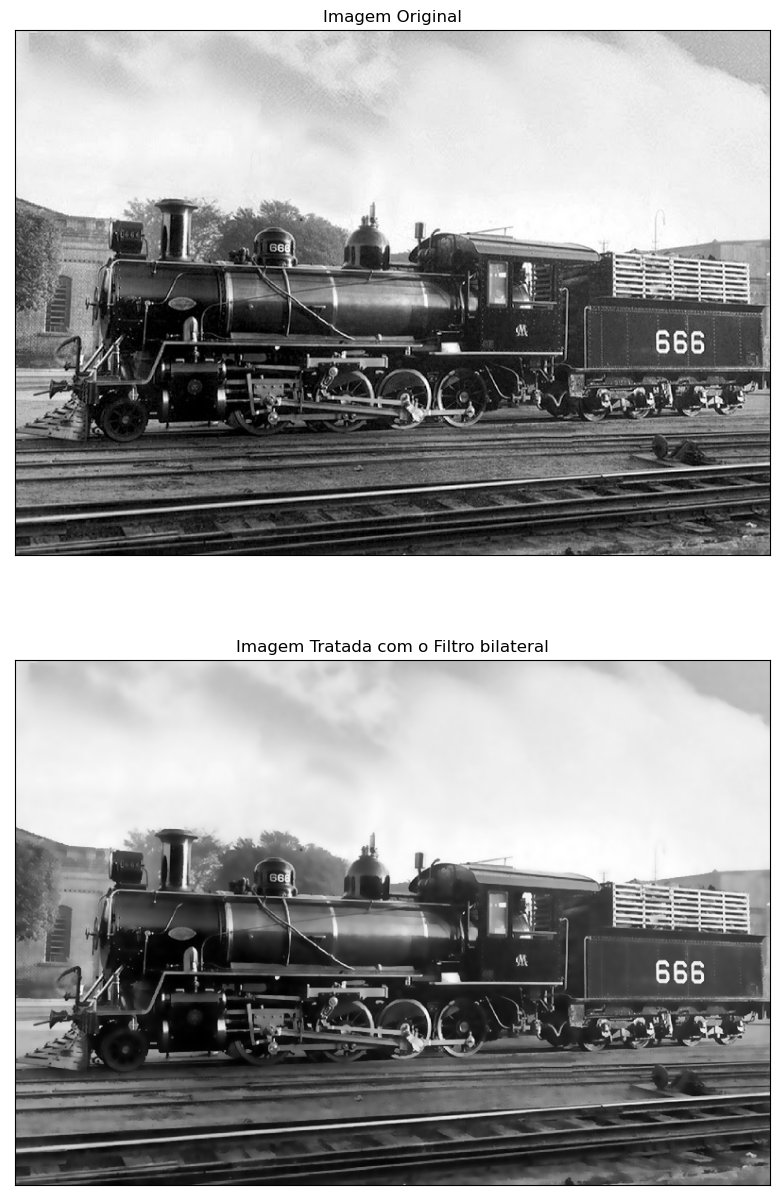

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgOrig = cv2.imread("imagem/CM.jpg")
imgTrat = cv2.bilateralFilter(imgOrig, 9, 75, 75)

plt.figure(figsize=(15,15))
plt.subplot(2,1,1), plt.imshow(imgOrig),plt.title('Imagem Original')
plt.xticks([]),plt.yticks([])
plt.subplot(2,1,2), plt.imshow(imgTrat),plt.title('Imagem Tratada com o Filtro bilateral')
plt.xticks([]),plt.yticks([])

A seguir um exemplo de aplicação, apenas para praticar, a aplicação de um filtro em uma captura de tempo real

In [ ]:
#Exemplo de aplicação de filtro em tempo real
import cv2

captura = cv2.VideoCapture(0)

while True:
     ret, frame = captura.read()
     #aplicando o filtro na captura.
     imgCor = cv2.bilateralFilter(frame, 5, 75, 75)
     cv2.imshow("Imagem", imgCor)
    
     if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
captura.release()
cv2.destroyAllWindows()

### 5. Realce de Bordas

O procedimento de filtragem em imagens possui duas outras aplicações tão importantes quanto o tratamento de ruído:
- extração de características;
- realce de arestas;
- contorno em imagens;

Será necessário então analisar três técnicas para extrair informações de altafrequência (contornos) e duas para ralçá-las.

#### 5.1. Operador de Sobel

Também nomeado de filtro de Sobel, é utilizado para realçar contornos em imagens. É um filtro não-linear e realça linhas verticas e horizontais mais escuras que o fundo, sem realçar pontos isolados.

Além disso, ele realça as arestas independente da direção: a filtragem pode ser realizada tanto vertical quanto horizontal. As regiões destacadas por esse procedimento resultam em bordas mais "grossas" comparadas ao resultado obtida com outras técnicas.

É mais utilizado para detecção de bordas. 

A função da biblitoca OpenCV para isso é a Sobel(), em que requer 5 parâmetros obrigatórios: imagem, variável que armazenará o valor que representa o pixel (Se for definido como CV_8U, ele vai de 0 a 255 e armazenado em 8 bytes); O terceiro e o quatro definem como o realce será aplicado (  [1,0] = horizontal / [0,1] = vertical) e o quinto valor será o tamanho da máscara de filtragem (números ímpares, preferenncialmente 1,3,5 ou 7)

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("imagem/garagem.jpg",0)
#imgConv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #convertendo para tons de cinza

sobelx = cv2.Sobel(imgConv, cv2.CV_8U, 1,0,ksize=3)
sobely = cv2.Sobel(imgConv, cv2.CV_8U,0,1,ksize=3)

plt.figure(figsize=(16,20))
plt.subplot(3,1,1),plt.imshow(imgConv),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(sobelx),plt.title('Sobel X')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(sobely),plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.show()


cv2.imshow("Original",imgConv)
cv2.imshow("Sobel X",sobelx)
cv2.imshow("Sobel Y",sobely)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'imgConv' is not defined

Um operador mais eficiente em realçar contornos é o operador laplaciano.

#### 5.2. Operador Laplaciano

É um filtro espacial. Possui uma máscara de ordem 3, que percorre toda a imagem alterando o pixel-alvo pela média podnerada dos pixels vizinhos, e depois elava ao quadrado o valor obtido.

- Tende a produzir bordas mais finas comparada ao filtro de Sobel, e é bastante sensível a ruído.

A função da biblioteca OpenCV utilizada é o Laplacian()

Só precisa da imagem e do tipo de dados nos pixels


In [ ]:
import cv2

imgOrig = cv2.imread("imagem/garagem.jpg",0)
imgTrat = cv2.Laplacian(imgOrig,cv2.CV_8U)

cv2.imshow("Original",imgOrig)
cv2.imshow("Tratada",imgTrat)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(16,20))
plt.subplot(3,1,1),plt.imshow(imgOrig),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(imgTrat),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

Observe que o operador laplaciano retorna as bordas em todas as direções...


Abaixo um exemplo do uso do laplacian em tempo real

In [8]:
#Exemplo de aplicação do operador laplaciano em tempo ral
import cv2

captura = cv2.VideoCapture(0)

while True:
     ret, frame = captura.read()
     #aplicando o filtro na captura.
     imgGray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
     #filtrando a imagem para diminuir ruídos
     imgGauss = cv2.GaussianBlur(imgGray,(3,3),10) 
     imgTrat = cv2.Laplacian(imgGauss,cv2.CV_8U)
     
     cv2.imshow("Imagem Original", frame)q
     #cv2.imshow("Imagem em cinza", imgGray)
     #cv2.imshow("Imagem filtrada em cinza", imgGauss)
     cv2.imshow("Laplacian", imgTrat)
    
     if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
captura.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

#### Aguçamento de bordas

O aguçamento de bordas pode ser realizado por meio da subtração da imagem original com o laplaciano dessa mesma imagem, utilizando a função subtract.

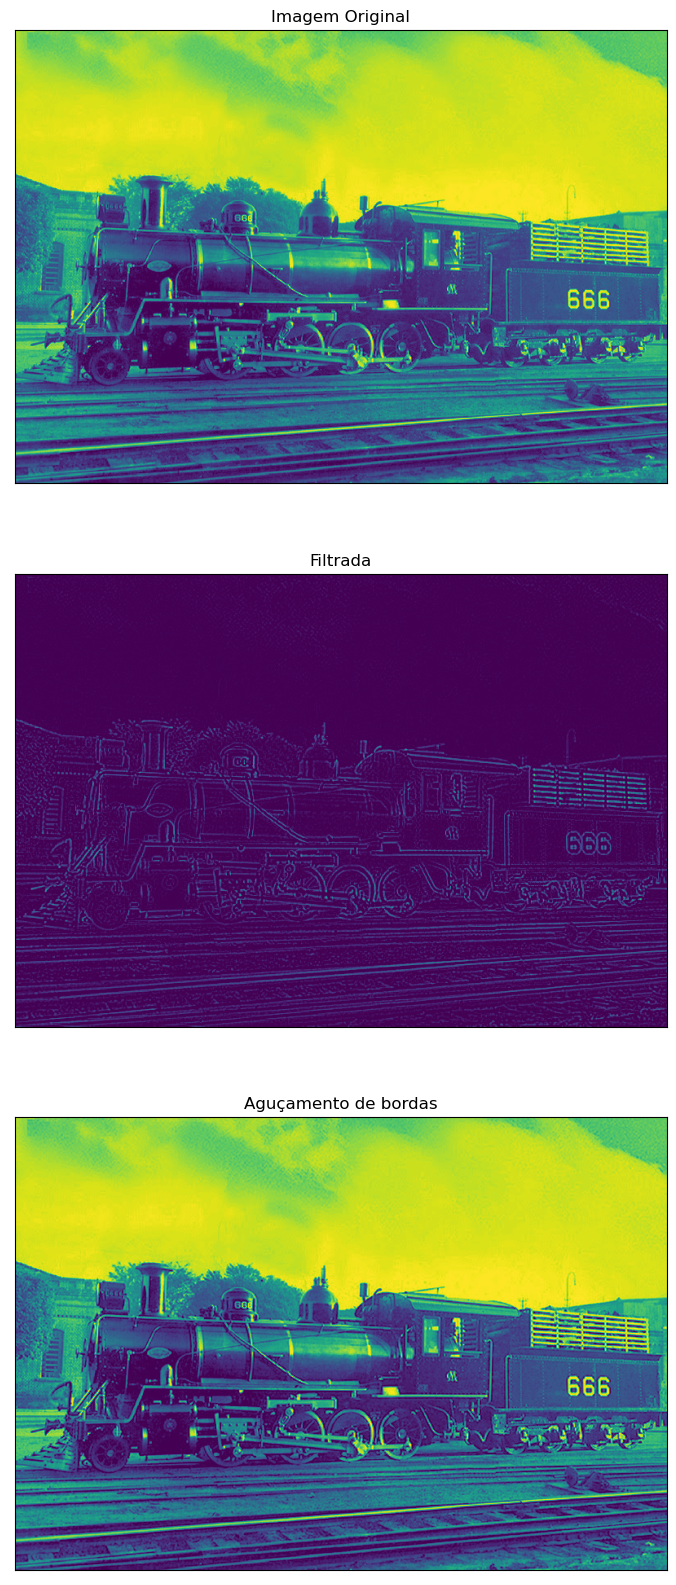

In [7]:
import cv2

imgOrig = cv2.imread("imagem/CM.jpg",0)
imgGauss = cv2.GaussianBlur(imgOrig,(3,3),10) 
imgFilt = cv2.Laplacian(imgGauss, cv2.CV_8U)
imgReal = cv2.subtract(imgOrig,imgFilt)

cv2.imshow("Original",imgOrig)
cv2.imshow("Filtrada",imgFilt)
cv2.imshow("Realcada",imgReal)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(16,20))
plt.subplot(3,1,1),plt.imshow(imgOrig),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(imgFilt),plt.title('Filtrada')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(imgReal),plt.title('Aguçamento de bordas')
plt.xticks([]), plt.yticks([])
plt.show()


### 5.3 Filtro Máscara de Desaguçamento (filtro de realce)

Subtração da imagem original por uma versão suavizada dela mesma. A imagem resultante desse procedimento contém as  características de contornos da original, ou seja, as informções de alta frequência.

Por fim, soma-se esses detalhes na imagem original, realçando as parte de altafrequência, ou seja, os contornos. Um exemplo abaixo.

- imgDetalhes = imgOriginal - imgSuavizada
- imgRealçada = imgOriginal + imgDetalhes




In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#puxando imagem em cinza
imgOriginal = cv2.imread("imagem/osso.jpg",0)
imgOriginal = cv2.resize(
    imgOriginal,  #imagem original
    None,    #variável que receberá a imagem
    fx=0.7,  #fator no eixo x
    fy=0.7,  #fator no eixo y
    interpolation = cv2.INTER_CUBIC) #método de interpolação
#aplicando filtro de suavização
imgSuavizada = cv2.GaussianBlur(imgOriginal,(13,13),3)

#retirando os detalhes, ou seja, pixesl de alta frequência
imgDetalhes = 3* cv2.subtract(imgOriginal, imgSuavizada)

#realçando detalhes
imgRealcada = cv2.add(imgDetalhes, imgOriginal)

cv2.imshow("Original",imgOriginal)
cv2.imshow("Detalhes",imgDetalhes)
cv2.imshow("Realcada",imgRealcada)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(16,20))
plt.subplot(3,1,1),plt.imshow(imgOriginal, cmap = 'gray'),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(imgDetalhes, cmap = 'gray'),plt.title('Detalhes')
plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(imgRealcada, cmap = 'gray'),plt.title('Realçada')
plt.xticks([]), plt.yticks([])
plt.show()

### 5.4. Detector de bordas de Canny

É um dos mais eficientes para detectar bordas em imagens. Método desenvolvido por John Canny.

 John Canny definiu que um bom detector de bordas deveria respeitar três características principais:
- O algorítmo deve ser capaz de identificar todas as bordas possíveis;
- Todas as bordas detectadas devem estar próximas das bordas originais da imagem;
- Bordas falsas não podem ser criadas, ou seja, cada borda deve ser definida uma única vez.

Esse algorítmo, além de utilizar o filtro gaussiano, também faz uso do operador Sobel.

A função da biblioteca OpenCV que realiza isso é a função Canny(), que necessita de três parâmetros (src (em tons de cinza), intensidade de detecção)

- Quanto maior os valors do terceiro e segundo parâmetro, menos bordas serão detectadas.



In [ ]:
import cv2

imgOriginal = cv2.imread("imagem/garagem.jpg",0)
imgTratada = cv2.Canny(imgOriginal, 100,200)

cv2.imshow("Original",imgOriginal)
cv2.imshow("Tratada",imgTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. Operações Morfológicas

No campo de estudo sobre processamento de imagens:

- Modificam o formato ou a estrutura dos objetos representados em uma imagem;
- Podem ser aplicadas a qualquer tipo de imagem, porém frequentemente usadas em imagens binárias, com finalidade de realçar o objeto de interesse, ou tratar ruídos provocados pelo processo de binarização;

Exemplos de aplicação:
- sistemas que realizam leitura de placa de veículo por imagem;

### 6.1. Elemento Estruturante.

Base de uma operação morfológica: Elemento estruturante.

- Elemento Estruturante: uma imagem binária, menor que a original, armazenada numa matriz quadrada.

A matriz que representa o elemento estruuturante percorerrá toda a imagem a ser tratada. E o valor de um píxel será alterado para seguir o padrão definido por esse elemento.

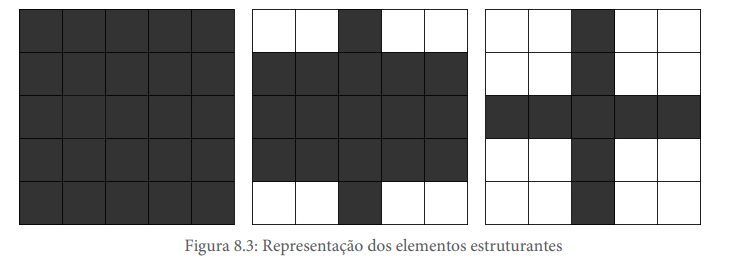

A biblioteca OpenCV tem três elementos estruturantes predefinidos e prontos para serem usados: retangular, elíptico e cruz.

exemplo abaixo

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#retângular
ret = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

#Elíptico
elip =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

#Cruz
cruz = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

plt.figure(figsize=(8,8))

plt.subplot(1,3,1),plt.imshow(ret),plt.title('Retângular')

plt.subplot(1,3,2),plt.imshow(elip),plt.title('Elípse')

plt.subplot(1,3,3),plt.imshow(cruz),plt.title('Cruz')

plt.show()

O uso de cada um desses elementos depende da função que ele exerce. Para realçar objetos de formato predominante circular, o elemento elíptico aprezenda melhores resultados. Para elementos com mais padrões retos que curvos, o objeto retângular é mais indicado.

Podemos gerar um elemento estruturante utilizando a biblioteca numpy da seguinte forma:


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

elementoEstruturante = np.matrix([
    [0,0,1,0,0],
    [0,1,1,1,0],
    [1,1,1,1,1],
    [0,1,1,1,0],
    [0,0,1,0,0],
],np.uint8)

plt.figure(figsize=(3,3))
plt.imshow(elementoEstruturante), plt.title('Novo elemento Estruturante')
plt.show()

### 6.2 Erosão e Dilatação

Todas as demais operações podem ser reduzidas a uma sequência de erosões e dilatações 

#### Operação de erosão

Caracterizada pela corrosão das arestas dos objetos de interesses, resultando em uma imagem "encolhida" do objeto. 
O algorítmo da operação de erosão consiste em sobrepor cada pixel da imagem de entrada com o centro do elemento estruturante. Se todos os elementos do elemento estruturante coincidirem com os pontos dos objetos de interesse, então, esse ponto torna-se partedo objeto na imagem de saída. 

_Obs: Nesse procedimento, a imagem de saída é inicialmente apenas com o fundo, ou seja, sem nenhum objeto inicialmente representado._

Pode-se utilizar a função erode() da biblioteca OpenCV, necessitando de apenas 3 parâmetros fundameitais: imagem a ser tratada, o elemento estruturante e o número de iterações desejadas.7

_O número de iterações é definido por tentativa e erro, até que o resultado esperado seja obtido._

In [ ]:
import cv2
import numpy as np

imagemOriginal= cv2.imread("imagem/rolamento.bmp",0)
elementoEstruturante = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(5,5)
)

elementoTeste = np.matrix([
    [1,0,1,0,1],
    [0,1,1,1,0],
    [0,0,1,1,1],
    [0,0,0,1,0],
    [0,0,0,0,1],
],np.uint8)

imagemProcessada = cv2.erode(
    imagemOriginal, elementoEstruturante, iterations =4
)
imagemProcessada2 = cv2.erode(
    imagemOriginal, elementoTeste, iterations =6
)


plt.figure(figsize=(8,8))

plt.subplot(1,3,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,3,2),plt.imshow(imagemProcessada),plt.title('Erosão com Elíse')

plt.subplot(1,3,3),plt.imshow(imagemProcessada2),plt.title('Erosão aleatória')

A operação de corroção é bom para "corroer" ruídos na imagem.

#### Operação de dilatação

O inverso da operação de corrosão, ou seja, o objeto de interesse será dilatado. A função da bibliteca OpenCV para isso é a função dilate(), seguindo o exemplo abaixo:

_Diferente do algorítmo de erosão, a imagem já é inicializada como cópia da imagem inicial, e também será realizada a comparação da imagem considerando o centro do elemento estruturante. O ponto faz parte da operação final se pelo menos um elemento da entrada coincidir com o elemento estruturante._

In [ ]:
import cv2
import numpy as np

imagemOriginal= cv2.imread("imagem/rolamento.bmp",0)
elementoEstruturante = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(5,5)
)

elementoTeste = np.matrix([
    [1,0,1,0,1],
    [0,1,1,1,0],
    [0,0,1,1,1],
    [0,0,0,1,0],
    [0,0,0,0,1],
],np.uint8)

imagemProcessada = cv2.dilate(
    imagemOriginal, elementoEstruturante, iterations =2
)
imagemProcessada2 = cv2.dilate(
    imagemOriginal, elementoTeste, iterations =4
)


plt.figure(figsize=(8,8))

plt.subplot(1,3,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,3,2),plt.imshow(imagemProcessada),plt.title('Dilatação com Elíse')

plt.subplot(1,3,3),plt.imshow(imagemProcessada2),plt.title('Dilatação aleatória')

plt.show()

### 6.3 Abertura e Fechamento

#### Operação de abertura

Caracterizada pela operação de erosão seguida pela operação de dilatação. Frequêntemente utilizada para tratar ruídos. A função que permite executar a operação de abertura rapidamente é a morphologyEx da biblioteca OpenCV.

Ela é utilizada com o intuído de reduzir ruídos em imagens, aplicando a operação de erosão primeiro e logo após a operação de abrtura.

In [ ]:
import cv2
import numpy as np

imagemOriginal = cv2.imread("imagem/rolamentoRuido.bmp",0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_OPEN, elementoEstruturante)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,2,2),plt.imshow(imagemProcessada),plt.title('Após tratamento')

plt.show()


#### Operação de fechamento

É utilizada para preencher a imagem, corrigindo pontos no objeto de interesse que foram danificados durante o processo de binarização. Essa operação consiste na operação de dilatação, seguida pela operação de erosão. 

A execução é utilizando a função morphologyEx com o parâmetro MORPH_CLOSE



In [ ]:
import cv2
import numpy as np

imagemOriginal = cv2.imread("imagem/rolamentoRuidoDentro.bmp",0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))

imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_CLOSE, elementoEstruturante)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,2,2),plt.imshow(imagemProcessada),plt.title('Após tratamento')

plt.show()


#### Abertura e fechamento em tons de cinza.

É um técnica pouco utilizada, que é usar as operações morfológicas dentro de imagens em tons de cinza. O procedimento é o mesmo, entretanto, utiliza como imagem base uma em tons de cinza, ao contrário de uma imagem binária.

- A operação de abertura, quando aplicada a imagem em tons de cinza, tende a suprimir pequenas regiões brilhantes nela.
- A operação de fechamento tende a suprimir pequenas regiões escuras nela.

São normalmente utilizadas para uniformizar a iluminação dos  objetos fotografados.

In [ ]:
import cv2
import numpy as np

imagemOriginal = cv2.imread("imagem/arroz.PNG",0)

elementoEstruturante = cv2.getStructuringElement(
    cv2.MORPH_CROSS, (100,100)
)

imagemProcessada = cv2.morphologyEx(
    imagemOriginal, cv2.MORPH_OPEN, elementoEstruturante
)

imagemSubtraida = cv2.subtract(imagemOriginal, imagemProcessada)

#Ajusta o contraste da saída
imagemTratada = cv2.add(imagemSubtraida, imagemSubtraida)

cv2.imshow("Original",imagemOriginal)
cv2.imshow("Resultado",imagemProcessada)
cv2.imshow("Subtraida",imagemSubtraida)
cv2.imshow("Tratada",imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### Gradiente Morfológico.

Resulta na borda do objeto de interesse. Utilizando o parâmetro MORPH_GRADIENT na função morphologyEx da biblioteca OpenCV



In [ ]:
import cv2
import numpy as np

imagemOriginal= cv2.imread("imagem/rolamento.bmp",0)
elementoEstruturante = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(3,3)
)

imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_GRADIENT, elementoEstruturante)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,2,2),plt.imshow(imagemProcessada),plt.title('Gradiente Morfológico')

plt.plot()

### 6.5. TOP HAT

A operaçõ Top Hat consiste na subtração da versão morfologicamente aberta de uma imagem com a versão original. 

Pode ser efetuada com o parâmetro MORPH_TOPHAT na função morphologyEx da biblioteca OpenCV.

Ela é frequentemente aplicada a fins de realçar objetos brilhantes  em fundos escuros. Também é aplicada com o intuito de corrigir a varição de luminosidade em imagens, possibilitando que objetos representados em regiões mais escuras sejam realçados.

In [64]:
import cv2
import numpy as np

imagemOriginal = cv2.imread("imagem/arroz.PNG",0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))

imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_TOPHAT, elementoEstruturante)

#ajuste de contraste
imagemTratada = cv2.add(imagemProcessada, imagemProcessada)

cv2.imshow("Original", imagemOriginal)
cv2.imshow("Resultado",imagemProcessada)
cv2.imshow("Final", imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

Utilizando elementos estruturantes de ordem menor que 25, é possível que os elementos iluminados sejam completamente eliminados da imagem, como por exemplo abaixo:

In [63]:
import cv2
import numpy as np

imagemOriginal = cv2.imread("imagem/galaxia.PNG",0)

elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

imagemProcessada = cv2.morphologyEx(imagemOriginal, cv2.MORPH_TOPHAT, elementoEstruturante)

#ajuste de contraste
imagemTratada = cv2.add(imagemProcessada, imagemProcessada)

cv2.imshow("Original", imagemOriginal)
cv2.imshow("Resultado",imagemProcessada)
cv2.imshow("Final", imagemTratada)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 6.6. Tratamento de Ruído

É possível eliminar ruídos com tratamento morfológicos, como, por exemplo, utilizar a erosão utilizando o elemento de cruz.

In [ ]:
import cv2
import numpy as np

imagemOriginal= cv2.imread("imagem/rolamentoRuido.bmp",0)
elementoEstruturante = cv2.getStructuringElement(
    cv2.MORPH_CROSS,(5,5)
)


imagemProcessada = cv2.erode(
    imagemOriginal, elementoEstruturante, iterations =1
)


plt.figure(figsize=(16,16))

plt.subplot(1,3,1),plt.imshow(imagemOriginal),plt.title('Imagem Real')

plt.subplot(1,3,2),plt.imshow(imagemProcessada),plt.title('Erosão com Elíse')

plt.show()

### 7. Segmentação de Objetos.

   Consiste em separar somente a área que representa o objeto de interesse em uma nova imagem, excluindo também o segundo plano dessa região.
   - O objeto a ser estudado é considerado o primeiro plano da imagem;
   - Os pixesl que não fazem parte de sua representação são denominados como segundo plano;
   
   O primeiro passo para que possamos extrair características do objeto é a segmentação.
   
### 7.1. Segmentação por binarização

Também conhecida como aplicação de limiar de itensidade. A separação do objeto de interesse por meio desse método ocorre pela definição do valor de um limiar. Nesse método, os pixels representados por valores maiores que o limiar são estabelecidos como o objeto de interesse, sendo definidos para cor preta ou branca. Do contrário, os pixels são redefinidos para a cor oposta à do objeto de interesse.

Portanto, a segmentação por binarização resulta numa imagem binária. 

A aplicação desse limiar é realizado pela função threshold() da biblioteca OpenCV. 
_Essa função requer quatro parâmetros obrigatórios. A imagem (em tons de cinza), o valor do limiar, a intensidade que receberá os pixels representados por valores superiores ao limiar e por fim o método de aplicação do limiar_

- THRESH_BINARY : Objeto de interesse na cor preta
- THRESH_BINARY_INV: Objeto de interesse na cor branca

Abaixo o exemplo de aplicação.

In [ ]:
#Importando as bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

#imagem original
imgOriginal = cv2.imread("imagem/graosDeCafe.PNG",0)

#metodo utilizado
metodo = cv2.THRESH_BINARY_INV

#aplicando o limiar
ret, imgBinarizada = cv2.threshold(imgOriginal, 150, 255, metodo)

#Exibindo as imagens
cv2.imshow("Imagem Original", imgOriginal)
cv2.imshow("Imagem Tratada", imgBinarizada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#plotando
plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imgOriginal),plt.title('Imagem Original')

plt.subplot(1,2,2),plt.imshow(imgBinarizada),plt.title('Imagem Tratada')

plt.show()

Observe que as imagens ainda existem falhas em seu interior. Para corrigir isso na binarização, é possível utilizar um filtro morfológico, da seguinte forma, utilizando a operação de fechamendo e a de erosão.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#elemento estruturante
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

#OPERAÇÃO DE FECHAMENTO
imagemProcessada = cv2.morphologyEx(imgBinarizada, cv2.MORPH_CLOSE, elementoEstruturante)

#OPERAÇÃO DE EROSÃO
imagemProcessada = cv2.erode(
    imagemProcessada, elementoEstruturante, iterations =3
)

#plotando resultado com o plt
plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imgBinarizada),plt.title('Imagem Real')

plt.subplot(1,2,2),plt.imshow(imagemProcessada),plt.title('Após tratamento')

plt.show()

#exibindo imagem com o cv2
cv2.imshow("Imagem Tratada", imagemProcessada)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#código completo:
#Importando as bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

#imagem original
imgOriginal = cv2.imread("imagem/graosDeCafe.PNG",0)

#metodo utilizado
metodo = cv2.THRESH_BINARY_INV

#aplicando o limiar
ret, imgBinarizada = cv2.threshold(imgOriginal, 150, 255, metodo)


#TRATANDO IMAGEM
#elemento estruturante
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

#OPERAÇÃO DE FECHAMENTO
imagemProcessada = cv2.morphologyEx(imgBinarizada, cv2.MORPH_CLOSE, elementoEstruturante)

#OPERAÇÃO DE EROSÃO
imagemProcessada = cv2.erode(
    imagemProcessada, elementoEstruturante, iterations =3
)

#Exibindo as imagens
cv2.imshow("Imagem Original", imgOriginal)
cv2.imshow("Imagem Tratada", imgBinarizada)
cv2.imshow("Imagem Tratada e corrigida", imagemProcessada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#plotando
plt.figure(figsize=(16,16))

plt.subplot(1,3,1),plt.imshow(imgOriginal),plt.title('Imagem Original')

plt.subplot(1,3,2),plt.imshow(imgBinarizada),plt.title('Imagem Tratada')

plt.subplot(1,3,3),plt.imshow(imagemProcessada),plt.title('Imagem Corrigida')

plt.show()

### 7.1.1 Binarização adaptativa

Infelizmente, a binarização por limiar pode ter grandes problemas caso a imagem não esteja uniformemente iluminada, e isso pode resultar em perde de informação.

Para corrigir isso, a biblioteca OpenCV disponibiliza a função adaptativeThreshold, que permite aplicar um algoritmo de binarização adaptativa a imagem, sendo necessária 6 valores como parâmetro:

- src: Matriz referente a imagem
- maxValue: valor de intensidade máxima do pixel
- adaptativeMethod: Algoritmo de binarização adaptativa;
- thresholdType: tipo de binarização;
- blockSize: Tamanho da máscara;
- C: Constante de subtração da média ou da média ponderada.

Para o terceiro parâmetro, a biblioteca OpenCV nos oferece as duas opções listadas:

- ADAPTATIVE_THRESH_MEAN_C
- ADAPTATIVE_THRESH_GAUSSIAN_C

O quarto parâmetro indica o tipo de aplicação do limiar, sendo os dois tipos mais usados o THRESH_BINARY e o THRESH_BINARY_INV. O quinto parâmetro indica o tamanho da máscara (que deve ser um número inteiro, positivo e ímpar.)

O sexto parâmetro define o valor constante que será subtraído do valor definido para cada pixel pelo algorítmo de binarização; Geralmente, esses parâmetros são definidos por tentativa e erro.

Código de exemplo:

In [ ]:
import cv2
import numpy as np

#pegando a imagem
imgOriginal = cv2.imread("imagem/comprimidos.PNG",0)

#tratando imagem
imgTratada = cv2.medianBlur(imgOriginal,7)

#binarizando a imagem
imgBinarizada = cv2.adaptiveThreshold(
    imgTratada, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11,5
)

#Mostrnado as imagens
cv2.imshow("Imagem Original", imgOriginal)
cv2.imshow("Imagem Tratada2", imgTratada)
cv2.imshow("Imagem Tratada", imgBinarizada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#plotando
plt.figure(figsize=(16,16))

plt.subplot(1,3,1),plt.imshow(imgOriginal),plt.title('Imagem Original')

plt.subplot(1,3,2),plt.imshow(imgTratada),plt.title('Imagem Tratada')

plt.subplot(1,3,3),plt.imshow(imgBinarizada),plt.title('Imagem Binarizada')

plt.show()

O único ruim nesse método é que ele pode resultar em imagens que não estejam totalmente preenchidas... Comparando o resultado com a binarização geral anteriormente mostrada.

In [ ]:
#código completo:
#Importando as bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

#imagem original
imgOriginal = cv2.imread("imagem/comprimidos.PNG",0)

#metodo utilizado
metodo = cv2.THRESH_BINARY_INV

#aplicando o limiar
ret, imgBinarizada = cv2.threshold(imgOriginal, 135, 255, metodo)


#TRATANDO IMAGEM
#elemento estruturante
elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

#OPERAÇÃO DE FECHAMENTO
imagemProcessada = cv2.morphologyEx(imgBinarizada, cv2.MORPH_CLOSE, elementoEstruturante)

#OPERAÇÃO DE EROSÃO
imagemProcessada = cv2.erode(
    imagemProcessada, elementoEstruturante, iterations =3
)

#Exibindo as imagens
cv2.imshow("Imagem Original", imgOriginal)
cv2.imshow("Imagem Tratada", imgBinarizada)
cv2.imshow("Imagem Tratada e corrigida", imagemProcessada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#plotando
plt.figure(figsize=(16,16))

plt.subplot(1,3,1),plt.imshow(imgOriginal),plt.title('Imagem Original')

plt.subplot(1,3,2),plt.imshow(imgBinarizada),plt.title('Imagem Tratada')

plt.subplot(1,3,3),plt.imshow(imagemProcessada),plt.title('Imagem Corrigida')

plt.show()

### 7.1.2 Binarização de Noboyuki Otsu

Diferente dos outros métodos de binarização, a Binarização de Otsu define automátiacmente o limiar de binarização, baseado no histograma da imagem. Esse algorítmo pode ser usado junto com à função threshold, necessitando apenas que aconstante THRESH_OTSU seja somada ao tipo definido para binarização.

EXEMPLO:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#imagem original
imgOriginal = cv2.imread("imagem/graosDeCafe.PNG",0)

#definindo tipo
tipo = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU

#aplicando método
limiar, imgBinarizada = cv2.threshold(imgOriginal, 0,255,tipo)

print(limiar)

#plotando resutlados.
#Exibindo as imagens
cv2.imshow("Imagem Original", imgOriginal)
cv2.imshow("Imagem Tratada", imgBinarizada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#usando o pyplot
#plotando resultado com o plt
plt.figure(figsize=(8,8))

plt.subplot(1,2,1),plt.imshow(imgOriginal),plt.title('Imagem Real')

plt.subplot(1,2,2),plt.imshow(imgBinarizada),plt.title('Após tratamento')

plt.show()

### 7.2. Segmentação por cor.

Esse método permite separar objetos de interesse representados por uma cor específica na imagem, para facilitar essa tarefa, o espaço de cor HSV é quase sempre utilizado, justamente por representar as informações referentes à cor (matiz) em um único canal.

O método inRange da bibliteca OpenCV pode ser utilizado para executar esse procedimento. Requerendo apenas três parâmetros obrigatórios: a imagem a ser representada no espaço HSV; o segundo um vetor contendo os valores referentes ao limite inferior da cor desejada, representada também no espaço HSV; e o terceiro, assim como o segundo, também é um vetor, entretanto, contém os valores referentes ao limite superior da cor desejada.

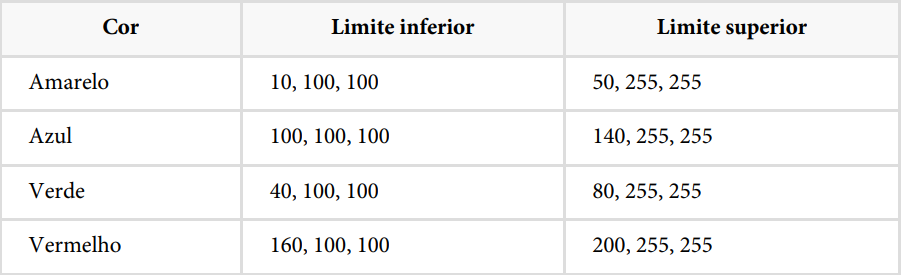


Para obter os valores de uma cor do espaço RGB no espaço HSV, podemos executar o procedimento exemplificado pelo código seguinte.

Basta definir os valores referentes à tonalidade de vermelho, verde e azul de uma cor no espaço RGB em um vetor:



In [24]:
import cv2
import numpy as np

#VERDE
verdeRGB=np.uint8([[[255,0,255]]])

#convertendo
verdeHSV = cv2.cvtColor(verdeRGB, cv2.COLOR_BGR2HSV)

print('HSV roxo:'+str(verdeHSV))

#vermelho
vermelhoRGB=np.uint8([[[0,0,255]]])

#convertendo
vermelhoHSV = cv2.cvtColor(vermelhoRGB, cv2.COLOR_BGR2HSV)
print('HSV vermelho:'+str(vermelhoHSV))

#azul
azulRGB=np.uint8([[[255,0,0]]])

#convertendo
azulHSV = cv2.cvtColor(azulRGB, cv2.COLOR_BGR2HSV)
print('HSV AZUL:'+str(azulHSV))


HSV roxo:[[[150 255 255]]]
HSV vermelho:[[[  0 255 255]]]
HSV AZUL:[[[120 255 255]]]


O resultado para limite inferior e superior somando +20 e -20 ao resultado, resultando na tabela acima. 
- Para o limite inferior, os canais de saturação e valor devem ser definidos como 100. 
- Para o limite superior, esses canais devem ser definidos papra o valor máximo, no caso 255.

In [9]:
import numpy as np

#limite inferior
#60 - 20 = 40
tomClaro = np.array([40,100,100])

#limite superior
#60+20 = 80
tomEscuro = np.array([80,255,255])

A seguir um exemplo de segmentação de cores com esse método, através da binarização.

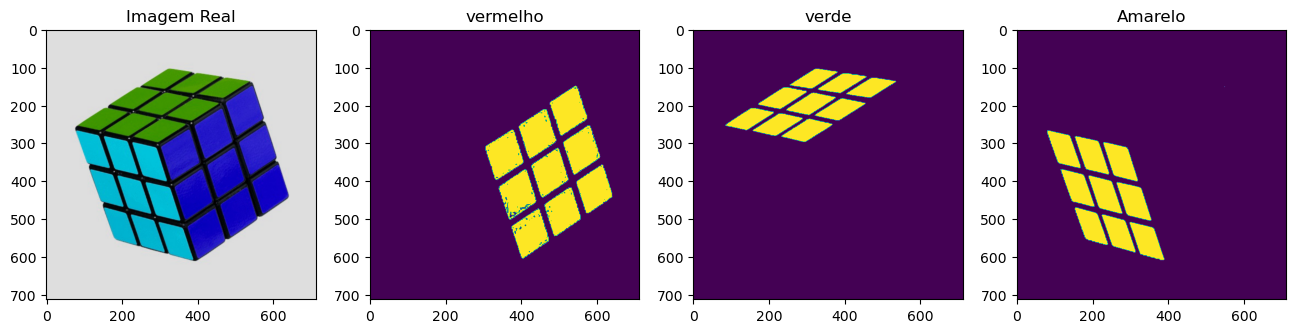

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#pegando imagem
imgRGB = cv2.imread("imagem/cuboMagico.PNG")
#convertendo para HSV
imgHSV = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2HSV)

#Tomando intervalos para segmentar imagem (vermelho)
tomClaroVE = np.array([160,100,100])
tomEscuroVE = np.array([200,255,255])
tomClaroVER = np.array([40,100,100])
tomEscuroVER = np.array([80,255,255])
tomClaroA = np.array([10,100,100])
tomEscuroA = np.array([50,255,255])

#VE - VERMELHO / VER - VERDE / A - AMARELO
imgSegmentadaVE = cv2.inRange(imgHSV, tomClaroVE, tomEscuroVE)
imgSegmentadaVER = cv2.inRange(imgHSV, tomClaroVER, tomEscuroVER)
imgSegmentadaA = cv2.inRange(imgHSV, tomClaroA, tomEscuroA)


cv2.imshow("Original",imgRGB)
cv2.imshow("Segmentada vermelha", imgSegmentadaVE)
cv2.imshow("Segmentada verde", imgSegmentadaVER)
cv2.imshow("Segmentada Amarelo", imgSegmentadaA)

cv2.waitKey(0)
cv2.destroyAllWindows()

#usando o pyplot
#plotando resultado com o plt
plt.figure(figsize=(16,16))

plt.subplot(1,4,1),plt.imshow(imgRGB),plt.title('Imagem Real')

plt.subplot(1,4,2),plt.imshow(imgSegmentadaVE),plt.title('vermelho')
plt.subplot(1,4,3),plt.imshow(imgSegmentadaVER),plt.title('verde')
plt.subplot(1,4,4),plt.imshow(imgSegmentadaA),plt.title('Amarelo')

plt.show()


Para corrigir os ruídos de segmentação, utiliza-se operações morfológicas.

### 7.3 Segmentação por bordas

Alguns métodos para realçar contornos em uma imagem podem ser usados como procedimentos de segmentação de objetos por borda. Os mais eficiêntes são o detector de bordas de Canny.

- Primeiro converte a imagem em tons de cinza
- Aplica o procedimento de segmentação
- Aplica as operações morfológicas de fechamento e erosão, para tratamento de ruído;
- Por fim, usa o método de Canny para detectar as bordas dos grãos, representando uma nova imagem somente as bordas referenets aos objetos de interesse.

Esse exemplo é dado a seguir:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#ETAPA 1 - Converter em tons de cinza
imgOriginal = cv2.imread("imagem/graosDeCafe.PNG",0)

#ETAPA 2 - Procedimento de segmentação
metodo= cv2.THRESH_BINARY_INV
ret, imgBinarizada = cv2.threshold(imgOriginal, 140,255,metodo)
print(ret)

#ETAPA 3 - Operações morfológicas para retirar ruídos
e = np.ones((3,3), np.uint8)
imgTratada = cv2.morphologyEx(imgBinarizada, cv2.MORPH_CLOSE,e)
imgTratada = cv2.erode(imgTratada, e, iterations =3)

#Etapa 4 - Aplicar método de Canny para detecção de bordas.
imgSegmentada = cv2.Canny(imgTratada,100,200)

#Imprimindo resultados
cv2.imshow("Binarizada",imgBinarizada)
cv2.imshow("Tratada",imgTratada)
cv2.imshow("Segmentada", imgSegmentada)

cv2.waitKey(0)
cv2.destroyAllWindows()

##usando o pyplot
#plotando resultado com o plt
plt.figure(figsize=(16,16))

plt.subplot(4,2,1),plt.imshow(imgOriginal),plt.title('Imagem Real')

plt.subplot(4,2,2),plt.imshow(imgBinarizada),plt.title('Binarizada')
plt.subplot(4,2,3),plt.imshow(imgTratada),plt.title('Tratada')
plt.subplot(4,2,4),plt.imshow(imgSegmentada),plt.title('Segmentada')

plt.show()

### 7.4 Segmentação por movimento.

Esse procedimento consiste em detectar objetos que se moveram entre uma captura e outra, a partir de uma câmera fixa. O método mais eficaz para essa tarefa é o subtract da biblioteca OpenCV. Dessa forma, os pixesl que não mudaram ficarão pretos. Após isso pode ser utilizada operações morfológicas para corrigir os erros na binarização.


### 8. EXTRAÇÃO DE CARACTERÍSTICAS
### 8.1. De Aspecto

As características de aspecto de um objeto de interesse definem informações sobre sua cor ou textura. Essas informações podem ser úteis para distinguir objetos de diferentes materiais, por exemplo, produzidos em madeira, metal ou cerâmica.

#### Cor

Para extrair as características de cor de uma imagem, a função ravel (da biblioteca OpenCV) e mode(da biblioteca Statistics) são as ferramentas eficientes e adequadas.

ravel é utilizada para armazenar em uma lista o valor da intensidade de todos os pixels que representam a imagem do objeto segmentado. Dessa forma, o valor que mais se repete (moda) é o analisado.

Exemplo:

In [11]:
import cv2
import statistics

imgTonsDeCinza = cv2.imread("imagem/cuboMagico.PNG",0)

rolTonsDeCinza = imgTonsDeCinza.ravel()

print("Moda da imagem: "+str(statistics.mode(rolTonsDeCinza)))

Moda da imagem: 222


também é possível conseguir a média dos valores da imagem.

In [12]:
import cv2

imgRGB = cv2.imread("imagem/cuboMagico.PNG")

valorMedio = cv2.mean(imgRGB)

print(valorMedio)

(145.1790648131574, 165.69004404281142, 182.6585865778598, 0.0)


Nesse caso acima, como a média dos valores vermelhos é maior, pode-se assumir que a cor predominante é vermelha.


### 8.2. Dimensionais

Definem informações sobre o tamanho do objeto de interesse. A área, o perímetro e o diâmetro são as três principais dessa categoria.

### Área do objeto

A área de um objeto de interesse é definida pelo total de pixels que o representa. Essa informação pode ser obtida através da função contourArea() da biblioteca OpenCV. Ela requer apenas o objeto segmentado como parâmetro, obtido com a função findContours().

findContours() extrai de uma imagem binária os pontos que representam os contornos dos objetos segmentados, sendo necessário três parãmetros: a imagem binária, o modo e o método de aproximação de contorno.

O modo indica como os pontos extraídos serão armazenados. O padrão utilizado é cv2.RETR_TREE. O método de aproximação de contorno define o critério que será usado para obter os pontos na imagem binária... O mais comum é o cv2.CHAIN_APPROX_SIMPLE (QUE INDICA QUE segmentos horizontais, verticais e diagonais serão comprimidos, deixando apenas os pontos finais.)

In [ ]:
import cv2
import numpy as np

imagem = cv2.imread("imagem/quadrado.PNG",0)
tipo = cv2.THRESH_BINARY
ret, imgBin = cv2.threshold(imagem, 127, 255, tipo)

#Obtendo os contornos dos objetos na imagem
modo = cv2.RETR_TREE
metodo = cv2.CHAIN_APPROX_SIMPLE
contornos, hierarquia = cv2.findContours(imgBin, modo, metodo)

#Obtendo os contornos do primeiro objeto segmentado
objeto = contornos[1]


#obtendo  a área do objeto segmentado
area = cv2.contourArea(objeto)
print(area)


#imagem2=cv2.drawContours(imgBin, contornos, -1, (0,255,0),4)

cv2.imshow("imagem com contornos", imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

Esse valor contem erros percentuais de +-0.5%, ou seja, não são valores exatos. Esse procedimento pode ser obtido também contabilizando o total de pixels brancos representados.

#### Perímetro do objeto

Definido como a soma dos pixels que representam o seu contorno. Este valor pode ser obtido pela função arcLength da biblioteca OpenCV, requerendo dois parâmetros obrigatórios. O primeiro indica o objeto de interesse obtido com a função findContours, e o segundo define o tipo de contorno que será obtido (true - caminho fechado / false - contorno aberto).

In [ ]:
perimetro = cv2.arcLength(objeto, True)
print(perimetro)

O erro nessa abordagem pode ser encontrado devido a binarização ou na função findContours(). Uma outra abordagem para obtermos o perímetro de um objeto é segmentar sua borda através do método de detecção de bordas de Canny, e então calcular a quantidade de pixels brancos.

### 8.3. Inerciais

As características inerciais definem informações sobre os momentos, o centro geométrico e as formas geométricas envolventes de um objeto de interesse. Algumas dessas características possibilitam reconhecimento de um objeto mesmo que ele tenha sofrido alterações na escala, rotação ou translação. 

#### Momentos de uma imagem

Os momentos de uma imagem (momentos estatísticos) é um dos principais métodos para extração de caracterísitcas de objetos em imagens. Eles são definidos por funções matemáticas, com base estatística, que fornecem valores que representam um determinado objeto. 

Esse valores são calculados a partir de imagens binárias do objeto segmentado. Os resultados objetidos com esses cálculos descrevem características como área, orientação e ponto geométrico do objeto de interesse.

Alguns desses momentos são invariantes, ou seja, não se modificam quando o objeto sofre alterações significativas na posição, rotação ou redimensionado.

A bibliteca OpenCV possui a função moments, que nos retorna uma estrutura contendo os valores dos 24 momentos que caracterizam o objeto.

In [ ]:
import cv2
import numpy as np

imagem = cv2.imread("imagem/quadrado.PNG",0)
momentos = cv2.moments(imagem)

print(momentos)

### Momentos invariantes de Hu

Os momentos invariantes de Hu são sete momentos calculados a partir dos momentos de uma imagem. Através deles, podemos obter a área, o centro geométrico e até mesmo um vetor de características invariantes em _escala, rotação e translação de um objeto._

Pela função HuMoments da biblitoeca Opencv, podemos obter os sete momentos invariantes de Hu. Requer apenas como parâmetro os momentos do objeto que podem ser obtidos com a função moments.



In [ ]:
import cv2
import numpy as np

#aplicando na imagem 1
imagem = cv2.imread("imagem/eng1.PNG",0)
momentos = cv2.moments(imagem)
momentosHu = cv2.HuMoments(momentos)

print("IMAGEM 1 -Momentos de Hu: \n"+str(momentosHu))

#Aplicando a transformação logaritmica
print("\nTransformação Logaritmica: \n" + str(-np.sign(momentosHu) * np.log10(np.abs(momentosHu))))


##ROTACIONANDO A IMAGEM
#Tomando tamanho e linhas
totalLinhas, totalColunas = imagem.shape

#rotacionando e modificando a escala
matriz = cv2.getRotationMatrix2D((totalColunas/2, totalLinhas/2),45,0.8)

imagemRotacionada = cv2.warpAffine(
    imagem,
    matriz,
    (totalColunas, totalLinhas)
)

momentos2 = cv2.moments(imagemRotacionada)
momentosHu = cv2.HuMoments(momentos2)

print("IMAGEM 2 -Momentos de Hu: \n"+str(momentosHu))

#Aplicando a transformação logaritmica
print("\nTransformação Logaritmica: \n" + str(-np.sign(momentosHu) * np.log10(np.abs(momentosHu))))


Observe que os valores tratados com a transformação logaritmica apresentam melhores resultados quando o objetivo é extrair características de figuras planas. Além disso, observe que todos os momentos são bastante semelhantes. Nesse caso, devido a diferenças quando adquiri as imagens, observe que os momentos mudaram. Entretanto, se fossem a mesma imagem aplicada certas transformações, isso seria mais evidente.

#### Centro Geométrico

O centro geométrico de um objeto, centróide, representa o centro de uma figura geométrica, que pode ser obtido pelos momentos da figura. Portanto, para encontrar as coordenadas x e y do centroide, utiliza-se:

In [ ]:
import cv2
import numpy as np

img = cv2.imread("imagem/quadrado.PNG",0)

momentos = cv2.moments(img)
cx = int(momentos['m10']/momentos['m00'])
cy = int(momentos['m01']/momentos['m00'])
 
print(cx, cy) #imprimindo coordenadas do centróide.

#### Retângulo envolvente

_"O retângulo envolvende de um objeto de interesse é o menor retângulo no qual ele pode ser inscrito."_ 

A função boudingRect da biblioteca OpenCV nos permite obter os dois vértices necessários para traçar o ret^ngulo, requerendo apenas o objeto como parâmetro.

Exemplo de como utilizar e o imprimir.

In [15]:
#importanto bibliotecas
import cv2
import numpy as np 

#pegando a imagem
imgRGB = cv2.imread("imagem/puzzle.PNG")
imgRGB2= cv2.imread("imagem/puzzle.PNG")
imgRGB3=cv2.imread("imagem/puzzle.PNG")

imgCinza = cv2.imread("imagem/puzzle.PNG",0)

#segmentação
tipo = cv2.THRESH_BINARY
ret, imgBin = cv2.threshold(
    imgCinza, 127, 255,tipo
)

#Encontrando os contornos
modo = cv2.RETR_TREE;
metodo = cv2.CHAIN_APPROX_SIMPLE;
contornos, hierarquia = cv2.findContours(imgBin, modo, metodo)
objeto = contornos[0] #caracteriza o objeto

#Obtendo os vértices do retângulo

x,y,w,h = cv2.boundingRect(objeto)

#Desenhando o retângulo na imagem 
cv2.rectangle(imgRGB, (x,y), (x+w, y+h),(0,255,0),2)

cv2.imshow("Retângulo Envolvente", imgRGB)
print(x,y,w,h)

cv2.waitKey(0)
cv2.destroyAllWindows()


88 92 369 360


A função rectangle necessita de 5 parâmetros:
- img: imagem em RGB de origem;
- pt1: vertice do retângulo;
- pt2: vértice oposto ao pt1;
- color: Cor em BGR da linha;
- thickness: Espessura da linha em pixels.

#### Circunferência envolvente.

_"A circunferência envolvente de um objeto é a menor circunferência no qual ele pode ser inscrito"._

A função minEclosingCircle da biblioteca OpenCV nos permite obter o ponto central e o raio dessa circunferência. 

O exemplo de encontrar ela é dada abaixo:

In [18]:
import cv2
import numpy as np

#obtendo o ponto central e o raio da circunferência
(x,y), raio = cv2.minEnclosingCircle(objeto)

centro=(int(x), int(y))
raio = int(raio)

#Desenhando a circunferência na imagem 
cv2.circle(imgRGB2, centro, raio, (255,0,0), 2)

cv2.imshow("Circunferência Envolvente", imgRGB2)

print(x,y,raio)

cv2.waitKey(0)
cv2.destroyAllWindows()

285.6996765136719 289.8641662597656 198


#### Elipse Ajustada

_"A Elipse ajustada de um objeto de interesse é a menor elipse na qual ele pode ser inscrito."_

A função fitEllipse da biblioteca OpenCV nos permite obter o menor retângulo rotacionado em que essa elipse pode ser inscrita, requerendo apenas o objeto como parâmetro.


In [17]:
import cv2
import numpy as np

#obtendo a elipse 
ellipse =cv2.fitEllipse(objeto)

#Desenhando a elipse na imagem
cv2.ellipse(imgRGB3, ellipse, (0,0,255),2)
cv2.imshow("Elipse Ajustada", imgRGB3)

print(ellipse)

cv2.waitKey(0)
cv2.destroyAllWindows()

((291.14251708984375, 294.08135986328125), (277.46282958984375, 340.7159729003906), 136.053955078125)


A função ellipse precisa de quatro parâmetros:
- img: A imagem rgb no qual a elipse será traçada.
- ellipse: Ellipse obtida com a função fitEllipse
- color: Com em BGR da linha
- thickness: Espessura da linha em pixels.

#### Orientação

A característica de orientação de um objeto é definida pelo ângulo ao qual uma elipse ajustada ao objeto está direcionada. Como exemplificado no tópico anterior, o ângulo referente à orientação é o terceiro valor retornado na lista pela função fitEllipse.

In [ ]:
import cv2
import numpy as np

ellipse = cv2.fitEllipse(objeto)
angulo = ellipse[2]
print(angulo)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 8.4. TOPOLOGICAS

_"As características topológicas definem informações que não variam quando o objeto de interesse é movido, rotacionado ou sofre distorções na largura e na altura."_ A quantidade de vértices e furos que um objeto possui são exemplos de características dessa categoria.

#### Número de vértices

O número de vértices de um objeto segmentado pode ser obtido com o auxílio da função approxPolyDP da biblioteca OpenCV. Esta define um poligono para o objeto, tendo como base os pontos que representam seu contorno.

Ela requer três parâmetros obrigatórios: O objeto a ser tratado, a precisão do objeto a um polígono (geralmente 10% do valor do perímetro do objeto" e o terceiro, quando definido como True, indica que a aproximação será definida através de uma curva fechada, caso contrário (False) será definida numa curva aberta.

Exemplo de aplicação com o quadrado.

In [ ]:
#obtendo o perímetro do objeto
perimetro = cv2.arcLength(objeto, True)

#Obtendo os pontos referentes aos vértices
poligono = cv2.approxPolyDP(objeto, 0.1*perimetro, True)

#obtendo o total de vértices
totalVertices = len(poligono)

print(totalVertices)

#### Número de furos

O número de furos de um objeto segmentado pode ser obtido pela função findContours, contabilizando o total de contornos detectados na imagem e subtraindo uma unidade, obtemos o total de furos. Exemplo de aplicação abaixo.

In [ ]:
import cv2
import numpy as np

#selecionando imagem
img = cv2.imread("imagem/3furos.PNG",0)

tipo = cv2.THRESH_BINARY
ret, imgBin = cv2.threshold(img, 127, 255, tipo)

#Encontrar os contornos
modo = cv2.RETR_TREE;
metodo = cv2.CHAIN_APPROX_SIMPLE;
contornos, hierarquia = cv2.findContours(imgBin, modo, metodo)

#Obtem o total de contornos e subtrai um.
furos = len(contornos)-1

print(furos)

cv2.waitKey(0)
cv2.destroyAllWindows()


### 9. RECONHECIMENTO DE PADRÕES


Caracterizado pelas suas características particulares, para isso, eles executam basicamente três procedimentos:

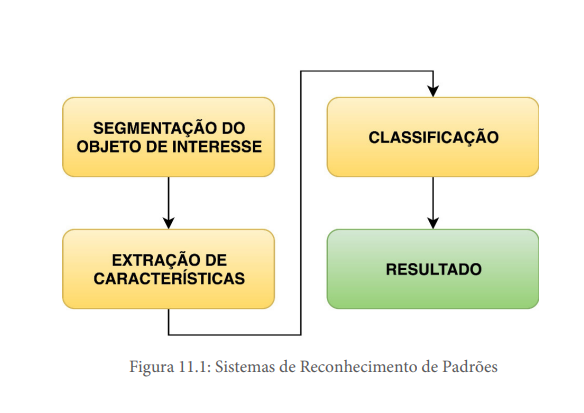

Uma classe pode ser definida como um conjunto de padrões que possuem as mesmas características.  O algoritmo que classifica o objeto a partir de suas características é conhecido como classificador. Os algoritmos de classificação mais populares em sistema de visão computacional são os bayesianos, o K-NN (K-Nearest Neighbor), a lógica Nebulosa e as Redes Neurais Artificiais.

A participação humana é fundamental não apenas para definir o algoritmo de classificação, mas também para definir as claasses e as características consideradas no processo. Portanto, uma tarefa frequentemente desenvolvida é medir a eficiência de diferentes classificadores.

Os classificadores precisam aprender alguns críterios para executar a tarefa. Existem dois métodos de aprendizagem de máquina bastante usados para ensiná-los: a aprendizagem supervisionada e a não supervisionada.

#### Aprendizagem supervisionada.

Nesse modelo de aprendizagem, o classificador é treinado para reconhecer padrões a partir de objetos já conhecidos. Um conjunto de características de objetos e suas respecitivas classes são apresentados ao classificador. A partir desses dados ele é treinado para identificar automaticamente padrões nessas informações, tornando-se capaz de classificar novos objetos.

Por necessitar de um agente externo, responsável por apresentar ao classificador dados para o treinamento, esse método é conhecido como supervisionado.

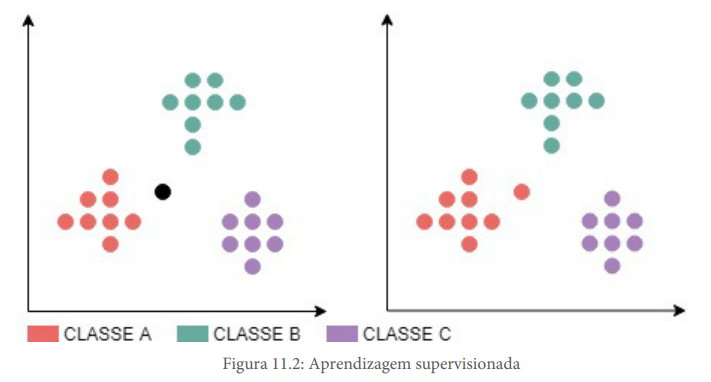

#### Aprendizado não-supervisionado

Esse método necessida de uma lista de características de diversos objetos para o treinamento. A diferença é que as classificações não precisam ser apresentadas, descartando a necessidade de um supervisor. Ou seja, os classificadores beaseados em aprendizagem não supervisionada são capazes de identificar classes por si só, considerando o quão semelhantes são as características dos objetos. Consequentemente, esse método pode ser utilizado para descobrir novos padrões. 

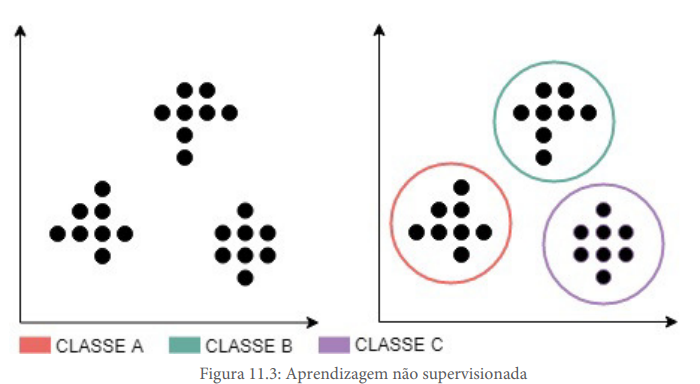

Um algorítimo de classificação baseado em aprendizagem supervisionada e frequentemente usado em sistemas de visão computacional é o k-Nearest Neighbors (K-NN).


### 10 CLASSIFICADOR K-NN

O algorítmo K-Nearest Neighbors (K-NN) - também conhecido como K Vizinhos Mais Próximos - é um dos algoritmos de classificação mais simples de ser compreendido.

Esse classificador opera por meio do método de aprendizagem supervisionada, ou seja, precisa ser previamente treinado por um especialista.

### 10.1 Algorítmo K-NN

O algorimto K-NN calcula a distância euclidiana entre o objeto e seus K vizinhos mais próximos.

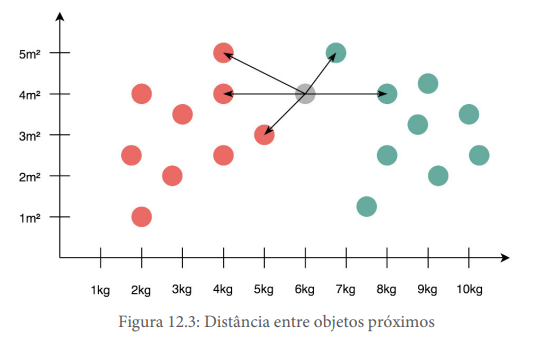

Com isso, ele irá considerar os K elementos mais próximos, e deles, ele analisa se existem mais pessoas de uma certa classe que a outra, se a classe predominante for, por exemplo, a classe vermelha, então esse novo objeto será classificado como da classe vermelha.

Geralmente são utilizados valores ímpares de K para evitar que tenhamos valores iguais entre os vizinhos. Além disso, não há restrição no número de características do espaço euclidiano, podendo pertencer ao $R^N$, em que N é o número de características. Lembrando que a distância, será dada pelo módulo do vetor diferença entre o objeto e o vizinho estudado.

### 10.2. K-NN com SCIKIT-LEARN

Um classificador K-NN pode ser implementado com poucas linhas de código, pela biblioteca scikit-learn. Ela dispõe de métodos prontos para criar, treinar e validar esse classificador.

#### Segmentação do objeto de interesse.

Primeira etapa.

#### Extração de caracteríticas

Inúmeras características desses objetos poderiam ser usadas para classificá-los. Nesse caso em específico, o número de dentes que compõe as engrenagens de cada classe. 
    A priori, Os momentos invariantes (Hu) também podem ser utilizadas, visto que são invariantes à escala e a rotação, facilitando a classificação do objeto.
    Em suma, quanto maior for o conjunto de treinamento, mais eficiente será o classificador

In [ ]:
import cv2
import numpy as np

#importando valores
#Chamando imagens.
A1 = cv2.imread("imagem/KNN/A1.PNG",0)
A2 = cv2.imread("imagem/KNN/A2.PNG",0)
A3 = cv2.imread("imagem/KNN/A3.PNG",0)

B1 = cv2.imread("imagem/KNN/B1.PNG",0)
B2 = cv2.imread("imagem/KNN/B2.PNG",0)
B3 = cv2.imread("imagem/KNN/B3.PNG",0)

#Adquirindo momentos
MA1=cv2.moments(A1)
MA2=cv2.moments(A2)
MA3=cv2.moments(A3)
MB1=cv2.moments(B1)
MB2=cv2.moments(B2)
MB3=cv2.moments(B3)

#Extraindo momentos Hu
MA1Hu = cv2.HuMoments(MA1)
MA2Hu = cv2.HuMoments(MA2)
MA3Hu = cv2.HuMoments(MA3)

MB1Hu = cv2.HuMoments(MB1)
MB2Hu = cv2.HuMoments(MB2)
MB3Hu = cv2.HuMoments(MB3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Treinamento do classificador

importanto a bibliocea scikit-learn, deve-se criar uma lista contendo as características dos objetos para a etapa do treinamento. Cada característica nessa lista é representada em outra lista.

In [ ]:
#Exemplo do livro
from sklearn.neighbors import KNeighborsClassifier

caracteristicas = [
[3.10,  11.98,  14.68,  16.86, -32.64,  22.85,  33.25],
[3.11,  12.36,  14.63,  17.06,  32.99,  23.34,  33.16],
[3.07,  12.26,  14.62,  15.32,  31.40, -22.69, -30.30],
[3.10,  11.98,  14.68,  16.86, -32.64,  22.85,  33.25],
[3.11,  12.36,  14.63,  17.06,  32.99,  23.34,  33.16],
[3.07,  12.26,  14.62,  15.32,  31.40, -22.69, -30.30],
[3.12,  11.72,  14.76,  15.33,  32.08,  21.40,  30.37],
[3.14,  11.78,  14.83,  15.59, -34.29,  21.71,  30.81],
[3.13,  10.43,  14.77,  15.44,  31.55,  20.75,  30.54],
[3.12,  11.72,  14.76,  15.33,  32.08,  21.40,  30.37],
[3.14,  11.78,  14.83,  15.59, -34.29,  21.71,  30.81],
[3.13,  10.43,  14.77,  15.44,  31.55,  20.75,  30.54]
]

classificacoes = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

knn = KNeighborsClassifier(3)

knn.fit(caracteristicas, classificacoes)

print(knn.score(caracteristicas, classificacoes))

objetoDesconhecido = [3.17, 11.84, 14.91, 16.22, -33.21, 22.38, 31.78]

print(knn.predict([objetoDesconhecido]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import cv2 
#
#Características para treino
caracteristicas = [MA1Hu.ravel(),MA2Hu.ravel(), MA3Hu.ravel(), MB1Hu.ravel(), MB2Hu.ravel(), MB3Hu.ravel()]

#Resultados
classificacoes = [0,0,0,1,1,1]

##Gerando o método
knn = KNeighborsClassifier(3)

#obs: Não é recomendado, para poucos dados, utilizar um valor de K
##superior a 3
#Treinando o classificador K-NN
knn.fit(caracteristicas, classificacoes)

print("Verificando se já foi treinado: "+str(knn.score(caracteristicas, classificacoes)))


#Objetos desconhecidos.
D1 = cv2.imread("imagem/KNN/objDesc1.PNG",0)
D2 = cv2.imread("imagem/KNN/objDesc2.PNG",0)

#Características de D1 e D2:
MD1 = cv2.moments(D1)
MD2 = cv2.moments(D2)

#Momentos invariantes
MD1Hu = cv2.HuMoments(MD1)
MD2Hu = cv2.HuMoments(MD2)

#Lista de objetos
objetos = [MD1Hu.ravel(),MD2Hu.ravel()]

#Aplicando o KNN treinado nesses objetos
print(knn.predict(objetos))

### 11 ALGORITMO HAAR  CASCADE

Desenvolvido por Paul Viola e Michael Jones em 2001, o Haar Cascade é um eficiente algorítmo de busca de objetos em imagens. Ele utiliza uma abordagem baseada em aprendizado de máquina, no qual são usadas imagens positivas e negativas para o treinamento. Imagens positivas são imagens que contêm o objeto de interesse representado; do contrário; as negativas são as que não contêm o objeto representado.

Com o proposito de extrair características do objeto de interesse, o Haar Cascade utiliza máscaras denominadas Haar Features, que funcionam como filtros que percorrem um conjunto de imagens que representam o objeto de interesse segmentado, efetuando operações para extrair características do objeto.

Na prática, o que determina as características do objeto é a variação de luminosidade, principalmente das regiões de borda que apresentam variações adruptas na intensidade do tom de cinza dos pixels. As mascaras do filtro detectam essas variações em diferentes amplitudes e direções, permitindo que o objeto seja detectado de forma ágil e precisa.

Com as características extraídas de um objeto, a partir de várias imagens de objetos pertencentes à mesma classe, a detecção deste objeto também é realizada através das máscaras. Eles percorrem cada imagem tentando localizar regiões que caracterizam o objeto.

Uma vez que a variação da luminosidade determina as características dos objetos representados na imagem, melhores resultados serão obtidos em ambientes com iluminação controlada, onde não exista variação de luz sobre os objetos fotografados ou filmados.


_obs: Haar Cascade não é um classificador,e sim um algoritmo para extração de características e detecção de objetos em imagens._ 

A seguir um código de HaarCascade para reconhecimento facil e detecção de movimento

In [ ]:
# import numpy as np
import cv2
import numpy as np
import time


#carregando arquivos de características do haarcascade treinado
cascadeFace = cv2.CascadeClassifier("cascades/haarcascade_frontalface_alt.xml")
cascadeSmile = cv2.CascadeClassifier("cascades/haarcascade_smile.xml")

#abrindo 
captura = cv2.VideoCapture(0)

#vetor para cada indivíduo
x_old = 0
y_old = 0
        
while True:
    start = time.time()
    ret, frameOrig = captura.read()
    frame = cv2.cvtColor(frameOrig, cv2.COLOR_BGR2GRAY)
     
    #faces
    faces = cascadeFace.detectMultiScale(frame, scaleFactor=1.3, minSize=(50,50))
    smiles = cascadeSmile.detectMultiScale(frame, scaleFactor=1.3, minSize=(50,50))
    #contador do laço
    
    cont = 1;
    
    #tamanho da imagem
    altura = frame.shape[0];
    largura = frame.shape[1];
    
    #identificando cada um
    for (x,y,w,h) in faces:
        cv2.rectangle(frameOrig, (x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frameOrig,"Individuo "+str(cont), (x,y-5), cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,9), 2)
        
        for (a,b,c,d) in smiles:
            if (a < x+w and a > x) and ( b > y and b < y+h):
                cv2.putText(frameOrig,"Sorrindo", (x,y+h+45), cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,255,255), 1)
            
                
        #analisando os valores de x
        if(x_old > x):
            cv2.putText(frameOrig,"Hori: Direita", (x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
        elif (x_old == x):
            cv2.putText(frameOrig,"Hori: Parado", (x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
        else:
            cv2.putText(frameOrig,"Hori: Esquerda", (x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
            
            
        #analisando os valores de y
        if(y_old > y):
            cv2.putText(frameOrig,"Vert: Cima", (x,y+h+30), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
        elif(y_old == y):
            cv2.putText(frameOrig,"Vert: Parado", (x,y+h+30), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
        else:
            cv2.putText(frameOrig,"Vert: Baixo", (x,y+h+30), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 1)
            
        #aumentando o contador.
        
        cont=cont+1;
        
        #atualizando contadores
        y_old=y;
        x_old=x;  
    
    #adicionando quantas faces existem.
    cv2.putText(frameOrig,"Dimensao: "+str(altura)+" x "+str(largura), (20,35), cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,9), 2)
    cv2.putText(frameOrig,"Numero de Individuos "+str(len(faces)), (20,20), cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,9), 2)
    
    #atualizando os contadores.
    cv2.imshow("Imagem", frameOrig)
    
    #esperando finalizar computação
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    
    end = time.time()
    print("Tempo de execução: "+str((end-start)*1000) + "ms")

captura.release()
cv2.destroyAllWindows()

Reconhecimento de um indivíduo pelo corpo

In [ ]:
# import numpy as np
import cv2

#carregando arquivos de características do haarcascade treinado
cascadeFace = cv2.CascadeClassifier("cascades/haarcascade_frontalface_alt.xml")

#abrindo 
captura = cv2.VideoCapture(0)

while True:
    ret, frameOrig = captura.read()
    frame = cv2.cvtColor(frameOrig, cv2.COLOR_BGR2GRAY)
     
    #faces
    faces = cascadeFace.detectMultiScale(frame, scaleFactor=1.3, minSize=(50,50))
    
    cont = 1;
    
    #monitorar movimento
    x_old=0;
    y_old=0;
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frameOrig, (x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frameOrig,"Face numero "+str(cont), (x,y-5), cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,9), 2)
        cont=cont+1;
        
        
    cv2.imshow("Imagem", frameOrig)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
captura.release()
cv2.destroyAllWindows()